<a href="https://colab.research.google.com/github/sneha-10-tyagi/LungCancer/blob/main/MINOR_PROJECT_CODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import random
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import plotly.figure_factory as ff #for heatmap
import plotly.express as px #for bar charts
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler


In [3]:
df = pd.read_csv('/content/minor_dataset - minor_dataset.csv')

#df.shape   # rows and columns count
df.info()  # overview
df.head()  # first few rows of the dataset
#df.columns # List of columns
df.isnull().sum()  # Count missing values in each column
df.dropna()  # Drop rows with missing data
#df.fillna(value=0)  # Fill missing values with 0
df.describe()  # Summary statistics for numerical columns
df.corr(numeric_only=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
AGE,1.000000,-0.084475,0.005205,0.053170,0.018685,-0.012642,0.012614,0.027990,0.055011,0.058985,0.169950,-0.017513,-0.001270,-0.018104
SMOKING,-0.084475,1.000000,-0.014585,0.160267,-0.042822,-0.141522,-0.029575,0.001913,-0.129426,-0.050623,-0.129471,0.061264,0.030718,0.120117
YELLOW_FINGERS,0.005205,-0.014585,1.000000,0.565829,0.323083,0.041122,-0.118058,-0.144300,-0.078515,-0.289025,-0.012640,-0.105944,0.345904,-0.104829
ANXIETY,0.053170,0.160267,0.565829,1.000000,0.216841,-0.009678,-0.188538,-0.165750,-0.191807,-0.165750,-0.225644,-0.144077,0.489403,-0.113634
PEER_PRESSURE,0.018685,-0.042822,0.323083,0.216841,1.000000,0.048515,0.078148,-0.081800,-0.068771,-0.159973,-0.089019,-0.220175,0.366590,-0.094828
CHRONIC DISEASE,-0.012642,-0.141522,0.041122,-0.009678,0.048515,1.000000,-0.110529,0.106386,-0.049967,0.002150,-0.175287,-0.026459,0.075176,-0.036938
FATIGUE,0.012614,-0.029575,-0.118058,-0.188538,0.078148,-0.110529,1.000000,0.003056,0.141937,-0.191377,0.146856,0.441745,-0.132790,-0.010832
ALLERGY,0.027990,0.001913,-0.144300,-0.165750,-0.081800,0.106386,0.003056,1.000000,0.173867,0.344339,0.189524,-0.030056,-0.061508,0.239433
WHEEZING,0.055011,-0.129426,-0.078515,-0.191807,-0.068771,-0.049967,0.141937,0.173867,1.000000,0.265659,0.374265,0.037834,0.069027,0.147640
ALCOHOL CONSUMING,0.058985,-0.050623,-0.289025,-0.165750,-0.159973,0.002150,-0.191377,0.344339,0.265659,1.000000,0.202720,-0.179416,-0.009294,0.331226


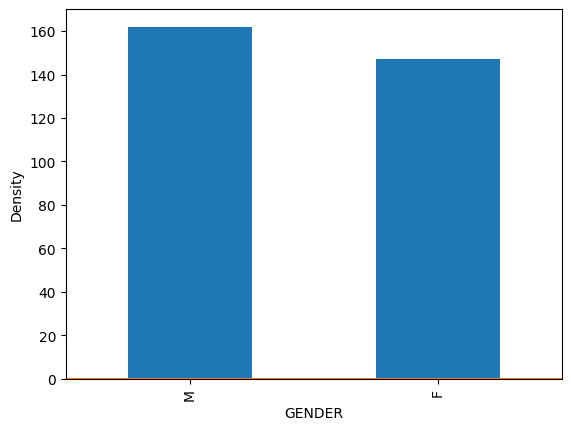

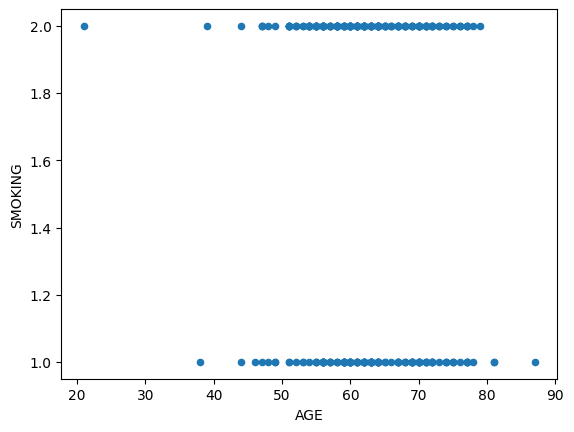

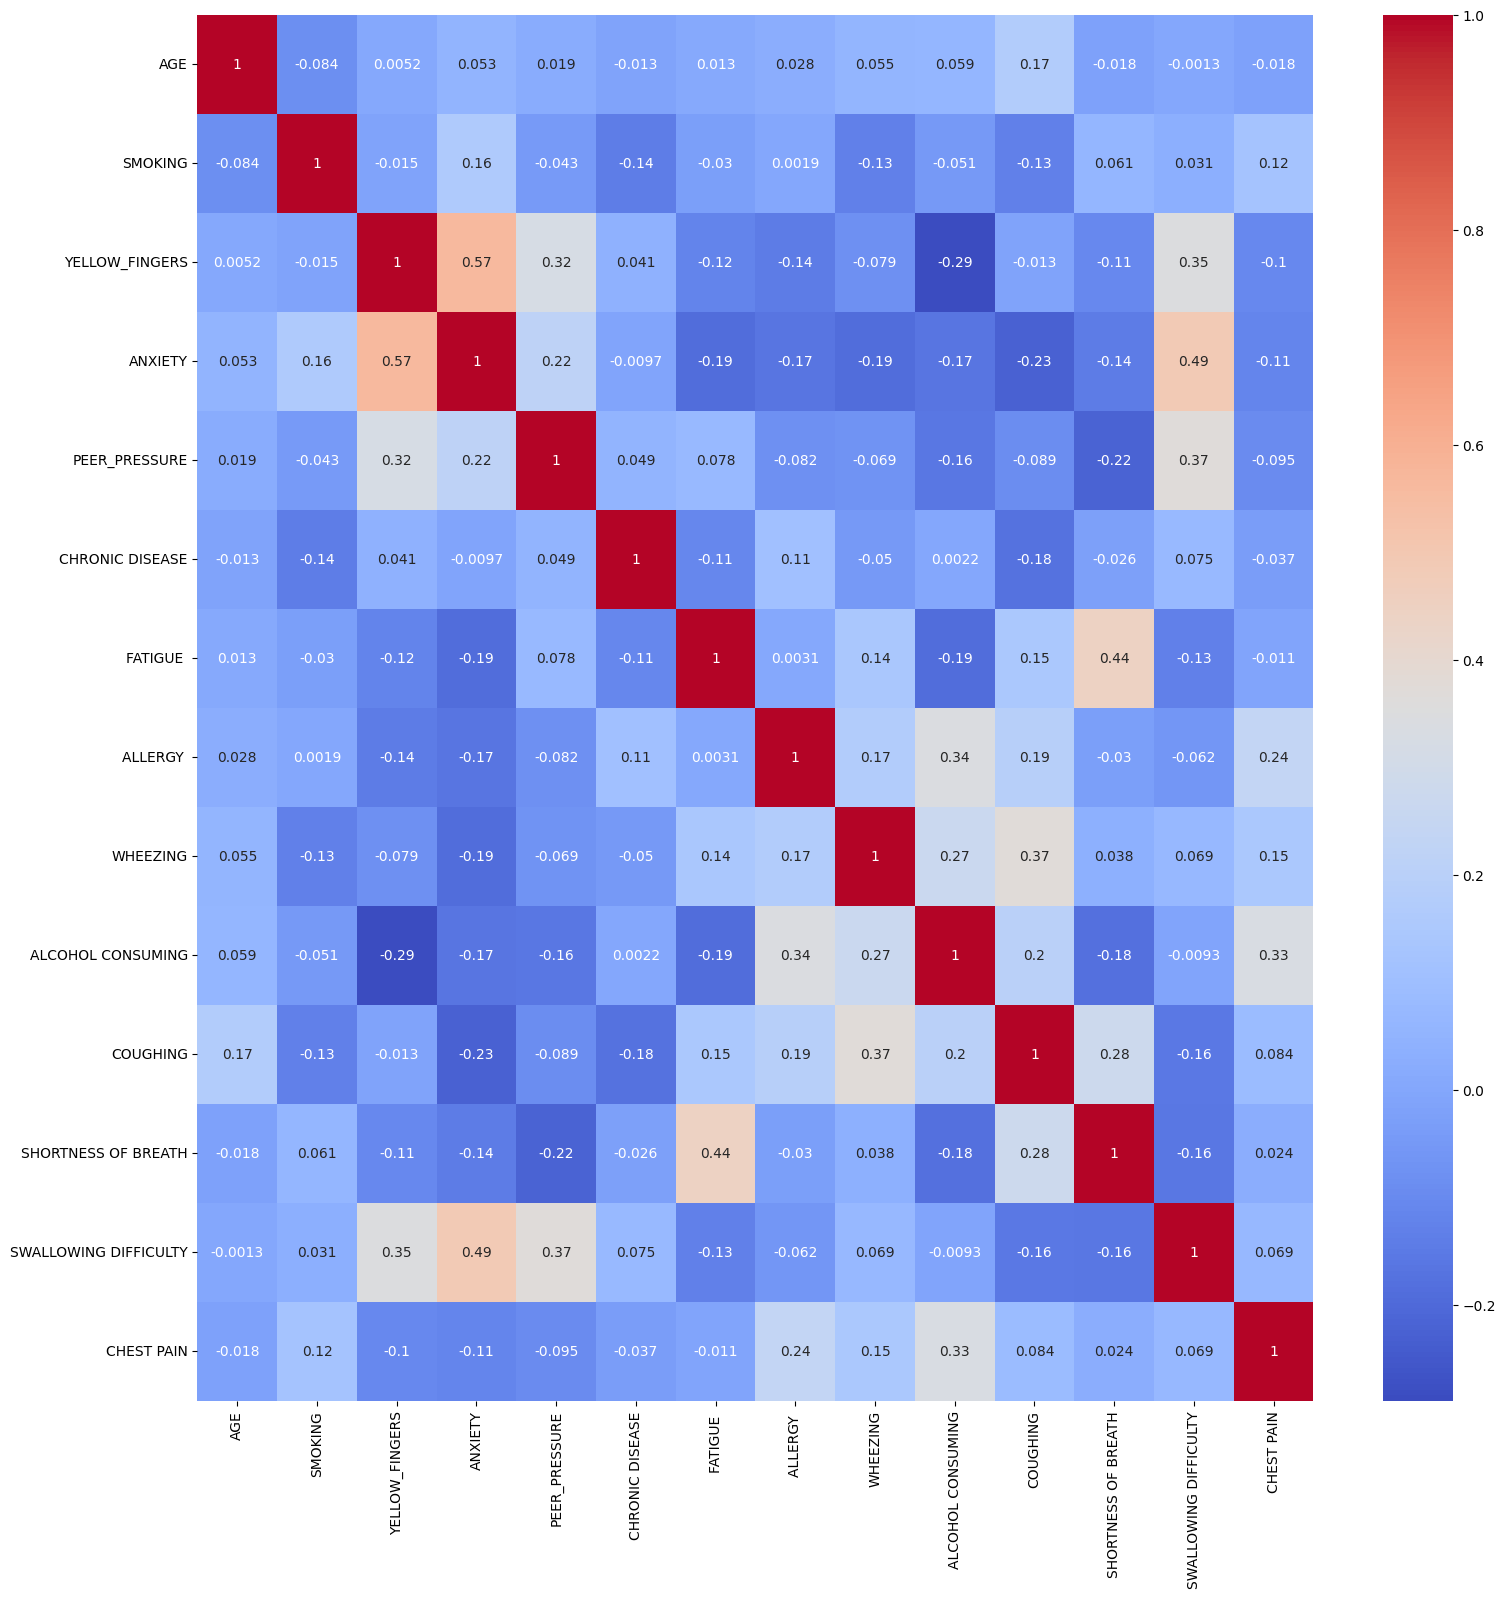

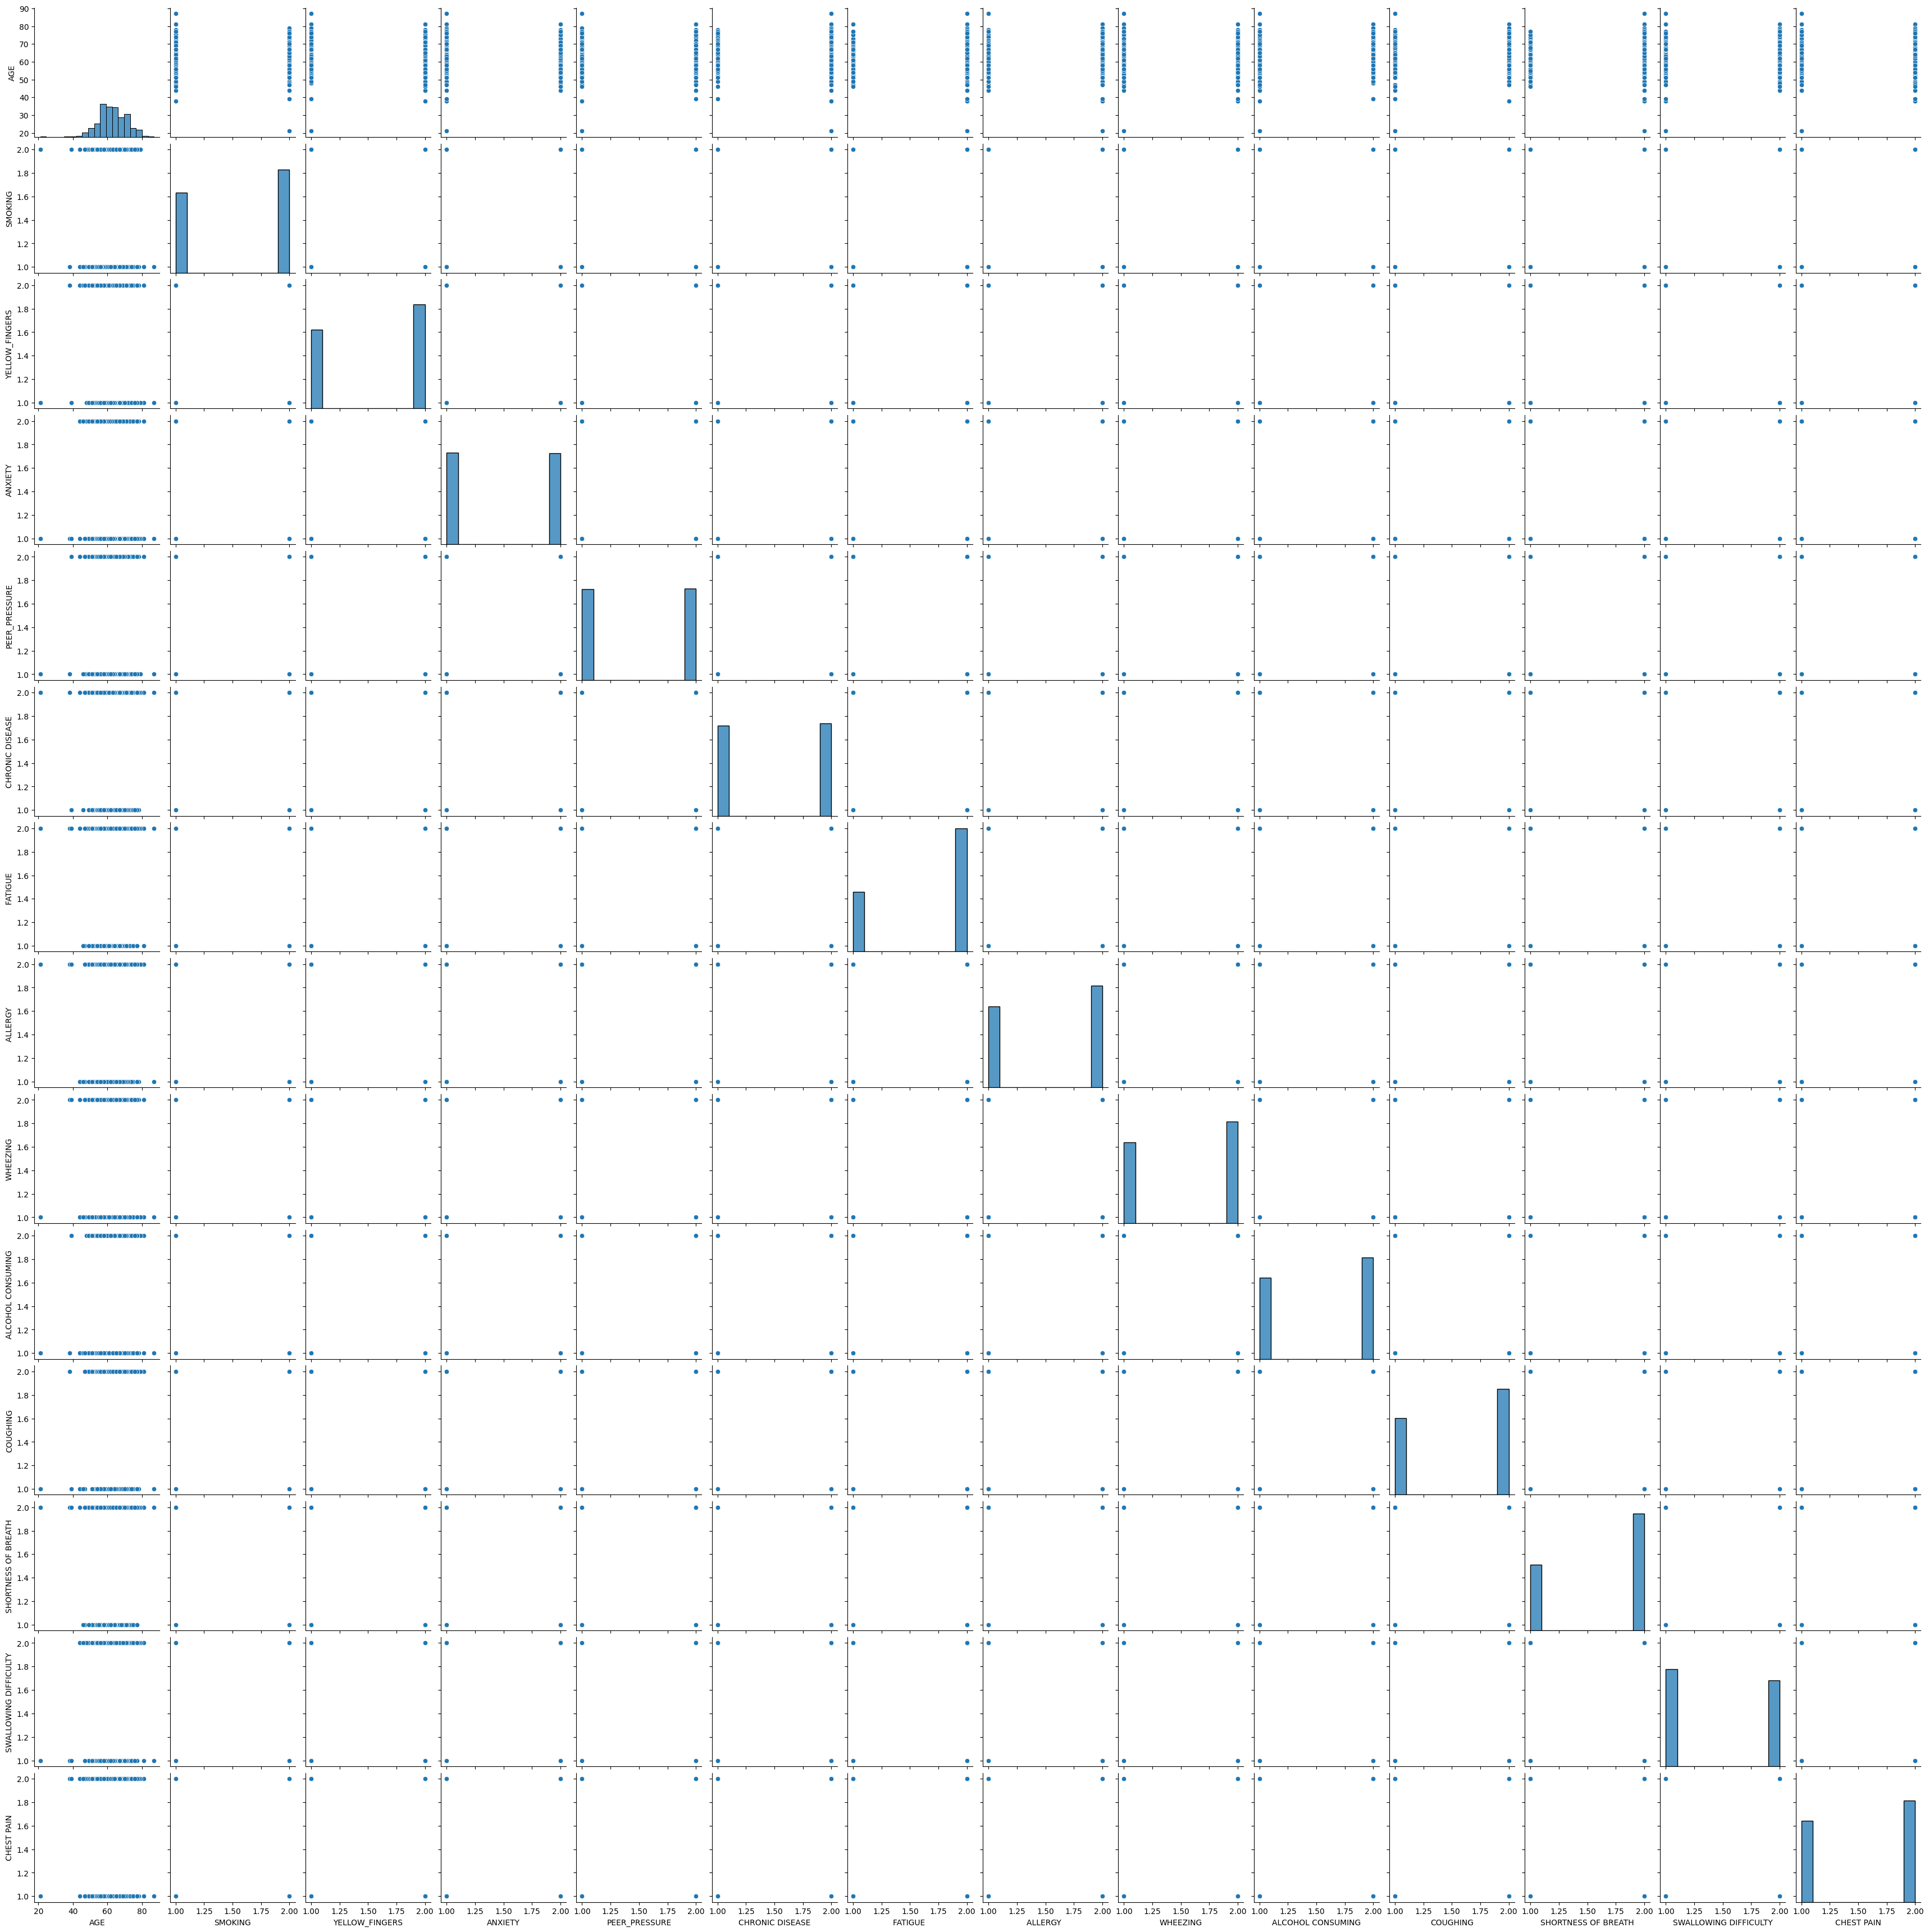

In [ ]:
df['GENDER'].hist()  # Histogram for numerical data
df['AGE'].plot(kind='density')  # Density plot
# Replace 'category_column' with an actual column from your DataFrame
df['GENDER'].value_counts().plot(kind='bar')  # Bar plot
df.plot.scatter(x='AGE', y='SMOKING')  # Scatter plot

plt.subplots(figsize=(18,18))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')  # Correlation matrix heatmap
sns.pairplot(df)

In [ ]:
X = df
y = df['LUNG_CANCER']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
le = preprocessing.LabelEncoder() #strings/other data types to integer
df['GENDER'] = le.fit_transform(df['GENDER'])
df['LUNG_CANCER'] = le.fit_transform(df['LUNG_CANCER'])

KNN

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Standardize the data
scaler = StandardScaler() # mean(0) , variance(1)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# GridSearch
param_grid = {'n_neighbors': list(range(3, 20))}  #  neighbors bw 3 and 20
grid_search = GridSearchCV(KNeighborsClassifier(weights='distance'), param_grid, cv=5) #5 fold cv
grid_search.fit(X_train_scaled, y_train)

# Get the best number of neighbors
best_k = grid_search.best_params_['n_neighbors']
print(f"Best number of neighbors: {best_k}")

# Re-train KNN model with optimal 'n_neighbors' and 'distance' weight
KNN = KNeighborsClassifier(n_neighbors=best_k, weights='distance')
KNN.fit(X_train_scaled, y_train)
y_pred_knn = KNN.predict(X_test_scaled)

# accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn) * 100
print(f"Accuracy: {accuracy_knn:.2f}%")

#precision
precision_knn = precision_score(y_test, y_pred_knn)
print(f"Precision: {precision_knn:.2f}")

#sensitivity
recall_knn = recall_score(y_test, y_pred_knn)
print(f"sensitivity: {recall_knn:.2f}")

#f1 score
f1_knn = f1_score(y_test, y_pred_knn)
print(f"F1-score: {f1_knn:.2f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix:")
print(cm)


Best number of neighbors: 7
Accuracy: 89.25%
Precision: 0.94
sensitivity: 0.94
F1-score: 0.94
Confusion Matrix:
[[10  5]
 [ 5 73]]


SVM

In [ ]:

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


from sklearn.svm import SVC
SVM = SVC()

SVM.fit(X_train, y_train)
predictions = SVM.predict(X_test)
val1 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for SVM: ", val1, "\n")
print("*Confusion Matrix for SVM: ")
print(confusion_matrix(y_test, predictions))

y_pred_svm = SVM.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_svm)

svm_result = accuracy_score(y_test,y_pred_svm)
print("Accuracy :",svm_result)
recall_svm = cm[0][0]/(cm[0][0] + cm[0][1])
precision_svm = cm[0][0]/(cm[0][0]+cm[1][1])
recall_svm,precision_svm


#  string to integers
y_test_numeric = y_test.map({0: 0, 1: 1})
predictions_numeric = pd.Series(predictions).map({0: 0, 1: 1})
# Confusion matrix
cm = confusion_matrix(y_test_numeric, predictions_numeric)
print("\nConfusion Matrix:\n", cm)

TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]

# Accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)
print(f"Accuracy: {accuracy:.2f}")

# Precision
precision = precision_score(y_test_numeric, predictions_numeric)
print(f"Precision: {precision:.2f}")

# sensitivity
recall = recall_score(y_test_numeric, predictions_numeric)
print(f"Recall (Sensitivity): {recall:.2f}")

# F1-Score
f1 = f1_score(y_test_numeric, predictions_numeric)
print(f"F1-Score: {f1:.2f}")


# print("\nManual Calculation:")
# manual_precision = TP / (TP + FP)  # Same as precision_score
# manual_recall = TP / (TP + FN)  # Same as recall_score
# manual_specificity = TN / (TN + FP)  # True Negative Rate
# print(f"Manual Precision: {manual_precision:.2f}")
# print(f"Manual Recall (Sensitivity): {manual_recall:.2f}")



*Accuracy score for SVM:  87.09677419354838 

*Confusion Matrix for SVM: 
[[ 5 10]
 [ 2 76]]
Accuracy : 0.8709677419354839

Confusion Matrix:
 [[ 5 10]
 [ 2 76]]
Accuracy: 0.87
Precision: 0.88
Recall (Sensitivity): 0.97
F1-Score: 0.93


DECISION TREE

In [ ]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.tree import DecisionTreeClassifier
log = DecisionTreeClassifier(random_state=0)
log.fit(X, y)
predictions = log.predict(X_test)
val = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for Decision Tree: ", val, "\n")
print("*Confusion Matrix for Decision Tree: ")
print(confusion_matrix(y_test, predictions))


y_pred_dc = log.predict(X_test)
cm = confusion_matrix(y_test, y_pred_dc)
dc_result = accuracy_score(y_test,y_pred_dc)
print("Accuracy :",dc_result)
recall_dc = cm[0][0]/(cm[0][0] + cm[0][1])
precision_dc = cm[0][0]/(cm[0][0]+cm[1][1])
recall_dc,precision_dc

# Train Decision Tree
from sklearn.tree import DecisionTreeClassifier
log = DecisionTreeClassifier(random_state=0)
log.fit(X_train, y_train)

# Predictions
y_pred_dc = log.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_dc)
print("\nConfusion Matrix:\n", cm)

TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]

# Accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)
print(f"Accuracy: {accuracy:.2f}")

# Precision
precision = precision_score(y_test, y_pred_dc, pos_label=1)
print(f"Precision: {precision:.2f}")

# Recall
recall = recall_score(y_test, y_pred_dc, pos_label=1)
print(f"Recall (Sensitivity): {recall:.2f}")

# F1-Score
f1 = f1_score(y_test, y_pred_dc, pos_label=1)
print(f"F1-Score: {f1:.2f}")

# manual_precision = TP / (TP + FP)  # Same as precision_score
# manual_recall = TP / (TP + FN)  # Same as recall_score
# manual_specificity = TN / (TN + FP)  # True Negative Rate
# print(f"Manual Precision: {manual_precision:.2f}")
# print(f"Manual Recall (Sensitivity): {manual_recall:.2f}")
# print(f"Manual Specificity (Selectivity): {manual_specificity:.2f}")


*Accuracy score for Decision Tree:  98.38709677419355 

*Confusion Matrix for Decision Tree: 
[[10  0]
 [ 1 51]]
Accuracy : 0.9838709677419355

Confusion Matrix:
 [[ 8  2]
 [ 2 50]]
Accuracy: 0.94
Precision: 0.96
Recall (Sensitivity): 0.96
F1-Score: 0.96


RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Feature selection
X = df.drop(['AGE', 'GENDER', 'SHORTNESS OF BREATH', 'SMOKING', 'LUNG_CANCER'], axis=1)
y = df['LUNG_CANCER']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Random Forest: {accuracy:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Precision
precision = precision_score(y_test, y_pred, pos_label=1)
print(f"Precision: {precision:.2f}")

# Sensitivity (Recall)
sensitivity = recall_score(y_test, y_pred, pos_label=1)
print(f"Sensitivity (Recall): {sensitivity:.2f}")

# F1 Score
f1 = f1_score(y_test, y_pred, pos_label=1)
print(f"F1 Score: {f1:.2f}")



Accuracy of Random Forest: 0.95
Confusion Matrix:
 [[ 1  1]
 [ 2 58]]
Precision: 0.98
Sensitivity (Recall): 0.97
F1 Score: 0.97


NAIVE BAYES

In [ ]:
# NAIVE BAYES
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB

# Initialize and train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions
y_pred_nb = nb_model.predict(X_test)

# Model Evaluation
accuracy_nb = accuracy_score(y_test, y_pred_nb)
cm_nb = confusion_matrix(y_test, y_pred_nb)

# Display results
print("Accuracy of the Naive Bayes model:", accuracy_nb)
print("\nConfusion Matrix:\n", cm_nb)

# Calculating Sensitivity (Recall) for the Naive Bayes model
sensitivity_nb = recall_score(y_test, y_pred_nb, pos_label=1)
print("\nSensitivity (Recall) of the Naive Bayes model:", sensitivity_nb)

# Calculating Precision for the Naive Bayes model
precision_nb = precision_score(y_test, y_pred_nb, pos_label=1)  # Precision = TP / (TP + FP)
print("\nPrecision of the Naive Bayes model:", precision_nb)

# Calculating F1 Score for the Naive Bayes model
f1_nb = f1_score(y_test, y_pred_nb, pos_label=1)
print("\nF1 Score of the Naive Bayes model:", f1_nb)


Accuracy of the Naive Bayes model: 0.8709677419354839

Confusion Matrix:
 [[ 5  5]
 [ 3 49]]

Sensitivity (Recall) of the Naive Bayes model: 0.9423076923076923

Precision of the Naive Bayes model: 0.9074074074074074

F1 Score of the Naive Bayes model: 0.9245283018867925


HYBRID MODEL

In [ ]:
#HYBRID MODEL

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter tuning for KNN and Decision Tree
param_grid_knn = {'n_neighbors': list(range(3, 20))}
grid_search_knn = GridSearchCV(KNeighborsClassifier(weights='distance'), param_grid_knn, cv=5)
grid_search_knn.fit(X_train_scaled, y_train)
best_k = grid_search_knn.best_params_['n_neighbors']
print(f"Best number of neighbors for KNN: {best_k}")

param_grid_tree = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search_tree = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid_tree, cv=5)
grid_search_tree.fit(X_train_scaled, y_train)
best_tree_params = grid_search_tree.best_params_
print(f"Best parameters for Decision Tree: {best_tree_params}")

# Initialize base models with optimized parameters
knn_model = KNeighborsClassifier(n_neighbors=best_k, weights='distance')
decision_tree_model = DecisionTreeClassifier(**best_tree_params, random_state=0)

# Create a stacking ensemble model with Random Forest as the meta-learner
stacking_model = StackingClassifier(
    estimators=[
        ('knn', knn_model),
        ('decision_tree', decision_tree_model),
        ('random_forest', RandomForestClassifier(n_estimators=100, random_state=0))
    ],
    final_estimator=LogisticRegression(max_iter=1000),
    cv=10
)

# Train the stacking model
stacking_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_stack = stacking_model.predict(X_test_scaled)

# Calculate accuracy
accuracy_stack = accuracy_score(y_test, y_pred_stack) * 100
print(f"Improved Ensemble Model Accuracy: {accuracy_stack:.2f}%")

# Confusion matrix
cm_stack = confusion_matrix(y_test, y_pred_stack)
print("Confusion Matrix:")
print(cm_stack)


Best number of neighbors for KNN: 3
Best parameters for Decision Tree: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Improved Ensemble Model Accuracy: 98.92%
Confusion Matrix:
[[14  1]
 [ 0 78]]
Classification Report:
              precision    recall  f1-score   support

          NO       1.00      0.93      0.97        15
         YES       0.99      1.00      0.99        78

    accuracy                           0.99        93
   macro avg       0.99      0.97      0.98        93
weighted avg       0.99      0.99      0.99        93



Teaching Learning Based Optimization

KNN

In [ ]:

from sklearn.neighbors import KNeighborsClassifier

# split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# objective function for TLBO
def objective_function(params):
    k = int(params[0])  # k value for k-NN
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn.fit(X_train_scaled, y_train)
    accuracy = knn.score(X_test_scaled, y_test)
    return 1 - accuracy  # Minimize 1 - accuracy

# TLBO for Hyperparameter Tuning
def TLBO(objective_func, population_size, num_generations, bounds):
    # Initialize population randomly within bounds
    population = np.random.uniform(low=bounds[:, 0], high=bounds[:, 1], size=(population_size, bounds.shape[0]))
    best_solution = None
    best_fitness = np.inf  # Minimize fitness

    for generation in range(num_generations):
        # Evaluate fitness of each solution in the population
        fitness = np.array([objective_func(ind) for ind in population])

        # Find the teacher (best solution so far)
        teacher_idx = np.argmin(fitness)
        teacher = population[teacher_idx]
        teacher_fitness = fitness[teacher_idx]

        if teacher_fitness < best_fitness:
            best_fitness = teacher_fitness
            best_solution = teacher

        # Teacher Phase
        mean_population = np.mean(population, axis=0)
        for i in range(population_size):
            teaching_factor = np.random.uniform(1, 2)  # Random teaching factor
            new_solution = population[i] + teaching_factor * (teacher - mean_population)
            new_solution = np.clip(new_solution, bounds[:, 0], bounds[:, 1])  # Ensure within bounds
            if objective_func(new_solution) < fitness[i]:
                population[i] = new_solution

        # Learner Phase
        for i in range(population_size):
            partner_idx = np.random.randint(population_size)
            if partner_idx != i:
                if fitness[i] < fitness[partner_idx]:
                    new_solution = population[i] + np.random.uniform() * (population[i] - population[partner_idx])
                else:
                    new_solution = population[i] + np.random.uniform() * (population[partner_idx] - population[i])
                new_solution = np.clip(new_solution, bounds[:, 0], bounds[:, 1])
                if objective_func(new_solution) < fitness[i]:
                    population[i] = new_solution

    return best_solution, best_fitness

# Set up bounds (e.g., k between 1 and 20)
bounds = np.array([[1, 20]])

# Apply TLBO for hyperparameter tuning
best_params, best_fitness = TLBO(objective_function, population_size=30, num_generations=100, bounds=bounds)
best_k = int(best_params[0])

# Re-train the k-NN classifier with the best k and compute accuracy, sensitivity, precision, F1 score, and confusion matrix
knn = KNeighborsClassifier(n_neighbors=best_k, weights='distance')
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
sensitivity = recall_score(y_test, y_pred, average='macro')
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print(f"Optimal k value found by TLBO: {best_k}")
print(f"Accuracy with optimal k: {accuracy:.4f}")
print(f"Sensitivity (Recall) with optimal k: {sensitivity:.4f}")
print(f"Precision with optimal k: {precision:.4f}")
print(f"F1 Score with optimal k: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)


Optimal k value found by TLBO: 8
Accuracy with optimal k: 0.9032
Sensitivity (Recall) with optimal k: 0.8346
Precision with optimal k: 0.8178
F1 Score with optimal k: 0.8258
Confusion Matrix:
[[11  4]
 [ 5 73]]


SVM

In [ ]:

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# objective function
def objective_function(params):
    C = params[0]  # C value for SVM (regularization)
    kernel = 'linear' if params[1] < 0.5 else 'rbf'  # SVM kernel: 0 -> linear, 1 -> rbf

    # Create and fit the SVM model
    svm = SVC(C=C, kernel=kernel, random_state=0)
    svm.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = svm.predict(X_test_scaled)

    # Calculate the metrics (accuracy, precision, recall, F1 score)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    # Return 1 - accuracy to minimize it (TLBO tries to minimize the objective)
    return 1 - accuracy

# TLBO for Hyperparameter Tuning
def TLBO(objective_func, population_size, num_generations, bounds):
    # Initialize population randomly within bounds
    population = np.random.uniform(low=bounds[:, 0], high=bounds[:, 1], size=(population_size, bounds.shape[0]))
    best_solution = None
    best_fitness = np.inf  # Minimize fitness

    for generation in range(num_generations):
        # Evaluate fitness of each solution in the population
        fitness = np.array([objective_func(ind) for ind in population])

        # Find the teacher (best solution so far)
        teacher_idx = np.argmin(fitness)
        teacher = population[teacher_idx]
        teacher_fitness = fitness[teacher_idx]

        if teacher_fitness < best_fitness:
            best_fitness = teacher_fitness
            best_solution = teacher

        # Teacher Phase
        mean_population = np.mean(population, axis=0)
        for i in range(population_size):
            teaching_factor = np.random.uniform(1, 2)  # Random teaching factor
            new_solution = population[i] + teaching_factor * (teacher - mean_population)
            new_solution = np.clip(new_solution, bounds[:, 0], bounds[:, 1])  # Ensure within bounds
            if objective_func(new_solution) < fitness[i]:
                population[i] = new_solution

        # Learner Phase
        for i in range(population_size):
            partner_idx = np.random.randint(population_size)
            if partner_idx != i:
                if fitness[i] < fitness[partner_idx]:
                    new_solution = population[i] + np.random.uniform() * (population[i] - population[partner_idx])
                else:
                    new_solution = population[i] + np.random.uniform() * (population[partner_idx] - population[i])
                new_solution = np.clip(new_solution, bounds[:, 0], bounds[:, 1])
                if objective_func(new_solution) < fitness[i]:
                    population[i] = new_solution

    return best_solution, best_fitness

# Set bounds for hyperparameters (C and kernel type)
# C: between 0.1 and 10, kernel: 0 (linear) or 1 (rbf)
bounds = np.array([[0.1, 10], [0, 1]])

# Apply TLBO for hyperparameter tuning
best_params, best_fitness = TLBO(objective_function, population_size=30, num_generations=100, bounds=bounds)
best_C = best_params[0]
best_kernel = 'linear' if best_params[1] < 0.5 else 'rbf'

# Re-train the SVM classifier with the best hyperparameters
svm = SVC(C=best_C, kernel=best_kernel, random_state=0)
svm.fit(X_train_scaled, y_train)
y_pred = svm.predict(X_test_scaled)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print the optimal hyperparameters and performance metrics
print(f"Optimal C value found by TLBO: {best_C}")
print(f"Optimal kernel found by TLBO: {best_kernel}")
print(f"Accuracy with optimal parameters: {accuracy:.4f}")
print(f"Precision with optimal parameters: {precision:.4f}")
print(f"Recall with optimal parameters: {recall:.4f}")
print(f"F1 Score with optimal parameters: {f1:.4f}")


Optimal C value found by TLBO: 0.4908889305408819
Optimal kernel found by TLBO: linear
Accuracy with optimal parameters: 0.9140
Precision with optimal parameters: 0.8725
Recall with optimal parameters: 0.7872
F1 Score with optimal parameters: 0.8212


DECISION TREE

In [ ]:

from sklearn.tree import DecisionTreeClassifier

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# TLBO Algorithm to optimize Decision Tree hyperparameters
def TLBO(num_iterations, population_size, num_features, X_train, y_train, X_test, y_test):
    # Initialize population (max_depth, min_samples_split)
    population = np.random.rand(population_size, num_features)  # Range [0, 1] for max_depth and min_samples_split
    population[:, 0] = (population[:, 0] * 20).astype(int) + 1  # Scale max_depth to range [1, 20]
    population[:, 1] = (population[:, 1] * 10).astype(int) + 2  # Scale min_samples_split to range [2, 10]

    # Best solution initialization
    best_solution = population[0]
    best_accuracy = 0

    for iteration in range(num_iterations):
        # Evaluate each candidate solution
        for i in range(population_size):
            max_depth = int(population[i, 0])
            min_samples_split = int(population[i, 1])

            # Train Decision Tree
            dt = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, random_state=0)
            dt.fit(X_train, y_train)
            y_pred = dt.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)

            # Update best solution if necessary
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_solution = population[i]

        # Teaching Phase:
        for i in range(population_size):
            if i != 0:
                # Teaching step: Update based on best solution
                population[i] = population[i] + np.random.rand(num_features) * (best_solution - population[i])
                population[:, 0] = (population[:, 0]).astype(int)
                population[:, 1] = (population[:, 1]).astype(int)
        # Learning Phase: Apply a random learning step
        for i in range(population_size):
            # Learning step: Random update
            random_idx = np.random.randint(0, population_size)
            population[i] = population[i] + np.random.rand(num_features) * (population[random_idx] - population[i])
            population[:, 0] = (population[:, 0]).astype(int)
            population[:, 1] = (population[:, 1]).astype(int)

    return best_solution, best_accuracy

# TLBO Parameters
num_iterations = 100  # Number of iterations (generations)
population_size = 20  # Population size
num_features = 2  # 2 features (max_depth, min_samples_split)

# Run the TLBO algorithm to optimize Decision Tree hyperparameters
best_solution, best_accuracy = TLBO(num_iterations, population_size, num_features, X_train, y_train, X_test, y_test)

# Extract the best parameters (max_depth, min_samples_split) from the TLBO result
best_max_depth = int(best_solution[0])
best_min_samples_split = int(best_solution[1])

# Train the final Decision Tree model t
dt_optimized = DecisionTreeClassifier(max_depth=best_max_depth, min_samples_split=best_min_samples_split, random_state=0)
dt_optimized.fit(X_train, y_train)

# Make predictions with the optimized model
y_pred_dt = dt_optimized.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_dt)
print("\nConfusion Matrix:\n", cm)

TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]

# Accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)
print(f"Accuracy: {accuracy:.2f}")

# Precision
precision = precision_score(y_test, y_pred_dt, pos_label=1)
print(f"Precision: {precision:.2f}")

# Recall (Sensitivity or True Positive Rate)
recall = recall_score(y_test, y_pred_dt, pos_label=1)
print(f"Recall (Sensitivity): {recall:.2f}")

# Specificity (Selectivity or True Negative Rate)
specificity = TN / (TN + FP)
print(f"Specificity (Selectivity): {specificity:.2f}")

# F1-Score
f1 = f1_score(y_test, y_pred_dt, pos_label=1)
print(f"F1-Score: {f1:.2f}")

# Output best parameters found by TLBO
print(f"\nBest Max Depth: {best_max_depth}")
print(f"Best Min Samples Split: {best_min_samples_split}")



Confusion Matrix:
 [[ 5  2]
 [ 3 83]]
Accuracy: 0.95
Precision: 0.98
Recall (Sensitivity): 0.97
Specificity (Selectivity): 0.71
F1-Score: 0.97

Best Max Depth: 5
Best Min Samples Split: 2


RANDOM FOREST

Iteration 1: Best Accuracy = 0.9677
Iteration 2: Best Accuracy = 0.9677
Iteration 3: Best Accuracy = 0.9677
Iteration 4: Best Accuracy = 0.9677
Iteration 5: Best Accuracy = 0.9677
Iteration 6: Best Accuracy = 0.9677
Iteration 7: Best Accuracy = 0.9677
Iteration 8: Best Accuracy = 0.9677
Iteration 9: Best Accuracy = 0.9677
Iteration 10: Best Accuracy = 0.9677
Iteration 11: Best Accuracy = 0.9677
Iteration 12: Best Accuracy = 0.9677
Iteration 13: Best Accuracy = 0.9677
Iteration 14: Best Accuracy = 0.9677
Iteration 15: Best Accuracy = 0.9677
Iteration 16: Best Accuracy = 0.9677
Iteration 17: Best Accuracy = 0.9677
Iteration 18: Best Accuracy = 0.9677
Iteration 19: Best Accuracy = 0.9677
Iteration 20: Best Accuracy = 0.9677
Iteration 21: Best Accuracy = 0.9677
Iteration 22: Best Accuracy = 0.9677
Iteration 23: Best Accuracy = 0.9677
Iteration 24: Best Accuracy = 0.9677
Iteration 25: Best Accuracy = 0.9677
Iteration 26: Best Accuracy = 0.9677
Iteration 27: Best Accuracy = 0.9677
Iteration 

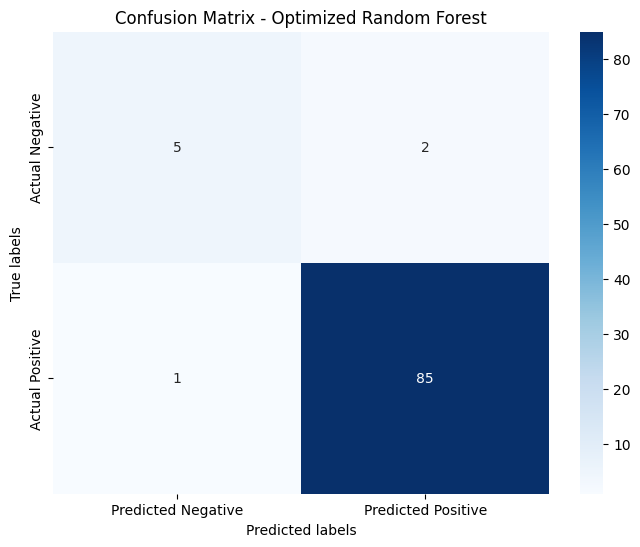

In [ ]:

# TLBO Algorithm for Hyperparameter Optimization
def TLBO(n_iterations=100, population_size=20, n_features=5):
    # Hyperparameter search space
    n_estimators_range = [50, 100, 150, 200]
    max_depth_range = [5, 10, 15, 20]
    min_samples_split_range = [2, 5, 10]
    min_samples_leaf_range = [1, 2, 4]
    bootstrap_range = [True, False]

    # Store ranges in a list
    ranges = [n_estimators_range, max_depth_range, min_samples_split_range, min_samples_leaf_range, bootstrap_range]

    # Initialize population
    population = np.zeros((population_size, n_features), dtype=int)  # Initialize with zeros
    for i in range(population_size):
        for j in range(n_features):
            population[i, j] = np.random.randint(0, len(ranges[j]))  # Assign random index for each hyperparameter

    # Evaluate the initial population (fitness)
    fitness = np.zeros(population_size)
    for i in range(population_size):
        params = population[i]

        # Get hyperparameter values using indices from population
        n_estimators = ranges[0][params[0]]
        max_depth = ranges[1][params[1]]
        min_samples_split = ranges[2][params[2]]
        min_samples_leaf = ranges[3][params[3]]
        bootstrap = ranges[4][params[4]]

        rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth,
                                    min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
                                    bootstrap=bootstrap, random_state=42)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_test)
        fitness[i] = accuracy_score(y_test, y_pred)  # Evaluate fitness (accuracy)

    # Main loop for TLBO
    for iteration in range(n_iterations):
        # Teaching phase
        best_teacher_index = np.argmax(fitness)
        best_teacher = population[best_teacher_index]
        best_teacher_fitness = fitness[best_teacher_index]

        for i in range(population_size):
            if i != best_teacher_index:
                learner = population[i]
                # Update learner based on the teacher
                new_learner = learner + np.random.uniform(0, 1) * (best_teacher - learner)
                # Ensure the new learner is within the hyperparameter bounds
                new_learner = np.clip(new_learner, 0, [len(n_estimators_range) - 1, len(max_depth_range) - 1,
                                                        len(min_samples_split_range) - 1, len(min_samples_leaf_range) - 1,
                                                        len(bootstrap_range) - 1])

                # Evaluate the new learner
                n_estimators = n_estimators_range[int(new_learner[0])]
                max_depth = max_depth_range[int(new_learner[1])]
                min_samples_split = min_samples_split_range[int(new_learner[2])]
                min_samples_leaf = min_samples_leaf_range[int(new_learner[3])]
                bootstrap = bootstrap_range[int(new_learner[4])]

                rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth,
                                            min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
                                            bootstrap=bootstrap, random_state=42)
                rf.fit(X_train, y_train)
                y_pred = rf.predict(X_test)
                new_fitness = accuracy_score(y_test, y_pred)

                # Accept the new learner if it has better fitness
                if new_fitness > fitness[i]:
                    population[i] = new_learner
                    fitness[i] = new_fitness

        # Learning phase

        # Find the best solution after the iteration
        best_solution_index = np.argmax(fitness)
        best_solution = population[best_solution_index]
        best_solution_fitness = fitness[best_solution_index]
        print(f"Iteration {iteration + 1}: Best Accuracy = {best_solution_fitness:.4f}")

    return population[np.argmax(fitness)], fitness[np.argmax(fitness)]

# TLBO for hyperparameter optimization
best_params, best_fitness = TLBO(n_iterations=50, population_size=10, n_features=5)

# Get the best hyperparameters from TLBO result
best_n_estimators = [50, 100, 150, 200][int(best_params[0])]
best_max_depth = [5, 10, 15, 20][int(best_params[1])]
best_min_samples_split = [2, 5, 10][int(best_params[2])]
best_min_samples_leaf = [1, 2, 4][int(best_params[3])]
best_bootstrap = [True, False][int(best_params[4])]

# Train and evaluate the Random Forest model with the best parameters
rf_optimized = RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth,
                                      min_samples_split=best_min_samples_split, min_samples_leaf=best_min_samples_leaf,
                                      bootstrap=best_bootstrap, random_state=42)

rf_optimized.fit(X_train, y_train)
y_pred_rf = rf_optimized.predict(X_test)

# Model Evaluation
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, pos_label=1)
sensitivity_rf = recall_score(y_test, y_pred_rf, pos_label=1)
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Print the evaluation metrics
print(f"Optimized Accuracy of Random Forest: {accuracy_rf:.4f}")
print(f"Optimized Precision of Random Forest: {precision_rf:.4f}")
print(f"Optimized Sensitivity (Recall) of Random Forest: {sensitivity_rf:.4f}")
print(f"Confusion Matrix:\n{cm_rf}")

# Optional: Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='g', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Optimized Random Forest')
plt.show()



NAIVE BAYES


In [ ]:

# split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# FEATURE SCALING
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# TEACHING-LEARNING-BASED OPTIMIZATION (TLBO) FUNCTION
def TLBO(objective_func, population_size, num_generations, bounds):
    population = np.random.uniform(low=bounds[:, 0], high=bounds[:, 1], size=(population_size, bounds.shape[0]))
    best_solution = None
    best_fitness = np.inf

    for generation in range(num_generations):
        fitness = np.array([objective_func(ind) for ind in population])
        teacher_idx = np.argmin(fitness)
        teacher = population[teacher_idx]
        teacher_fitness = fitness[teacher_idx]

        if teacher_fitness < best_fitness:
            best_fitness = teacher_fitness
            best_solution = teacher

        mean_population = np.mean(population, axis=0)
        for i in range(population_size):
            teaching_factor = np.random.uniform(1, 2)
            new_solution = population[i] + teaching_factor * (teacher - mean_population)
            new_solution = np.clip(new_solution, bounds[:, 0], bounds[:, 1])
            if objective_func(new_solution) < fitness[i]:
                population[i] = new_solution

        for i in range(population_size):
            partner_idx = np.random.randint(population_size)
            if partner_idx != i:
                if fitness[i] < fitness[partner_idx]:
                    new_solution = population[i] + np.random.uniform() * (population[i] - population[partner_idx])
                else:
                    new_solution = population[i] + np.random.uniform() * (population[partner_idx] - population[i])
                new_solution = np.clip(new_solution, bounds[:, 0], bounds[:, 1])
                if objective_func(new_solution) < fitness[i]:
                    population[i] = new_solution

    return best_solution, best_fitness

# DEFINE THE OBJECTIVE FUNCTION FOR NAIVE BAYES WITH CROSS-VALIDATION
def objective_function(params):
    var_smoothing = params[0]
    nb_model = GaussianNB(var_smoothing=var_smoothing)
    nb_model.fit(X_train, y_train)
    y_pred = nb_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return 1 - accuracy  # Minimize 1 - accuracy

# SET BOUNDS FOR TLBO (var_smoothing between 1e-9 and 1e-1)
bounds = np.array([[1e-9, 1e-1]])

# RUN TLBO FOR HYPERPARAMETER TUNING
best_params, _ = TLBO(objective_function, population_size=30, num_generations=100, bounds=bounds)
best_var_smoothing = best_params[0]
print(f"Optimal var_smoothing: {best_var_smoothing}")

# TRAIN NAIVE BAYES WITH OPTIMAL HYPERPARAMETERS
nb_optimized = GaussianNB(var_smoothing=best_var_smoothing)
nb_optimized.fit(X_train, y_train)
y_pred_nb = nb_optimized.predict(X_test)

# MODEL EVALUATION
accuracy_nb = accuracy_score(y_test, y_pred_nb)
cm_nb = confusion_matrix(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb, pos_label=1)
sensitivity_nb = recall_score(y_test, y_pred_nb, pos_label=1)

# DISPLAY RESULTS
print("\nConfusion Matrix:\n", cm_nb)
print(f"Accuracy of Naive Bayes: {accuracy_nb:.4f}")
print(f"Precision of Naive Bayes: {precision_nb:.4f}")
print(f"Sensitivity (Recall) of Naive Bayes: {sensitivity_nb:.4f}")


Optimal var_smoothing: 0.032342048810169347

Confusion Matrix:
 [[ 5  5]
 [ 3 49]]
Accuracy of Naive Bayes: 0.8710
Precision of Naive Bayes: 0.9074
Sensitivity (Recall) of Naive Bayes: 0.9423


CUCKOO SEARCH

KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import levy

# Cuckoo Search parameters
num_nests = 25          # Number of solutions (nests)
num_iterations = 100    # Number of generations
pa = 0.25               # Discovery rate of alien eggs/solutions

# Function to calculate the Levy flight step
def levy_flight(Lambda):
    return levy.rvs(size=1) * Lambda

# Cuckoo Search algorithm function
def cuckoo_search(X_train, y_train, X_test, y_test):
    # Initialize nests with random k values between 1 and 20
    nests = np.random.randint(1, 21, num_nests)
    best_accuracy = 0
    best_nest = None

    for iteration in range(num_iterations):
        # Randomly choose a cuckoo solution and perform levy flight
        cuckoo_idx = np.random.randint(0, num_nests)
        cuckoo_solution = nests[cuckoo_idx] + levy_flight(0.3).astype(int)[0]
        cuckoo_solution = max(1, min(20, cuckoo_solution))  # keep in range [1,20]

        # Evaluate the new solution
        knn = KNeighborsClassifier(n_neighbors=cuckoo_solution)
        knn.fit(X_train, y_train)
        accuracy = accuracy_score(y_test, knn.predict(X_test))

        # Replace the worst solution if the new one is better
        worst_idx = np.argmin([accuracy_score(y_test, KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train).predict(X_test)) for k in nests])
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_nest = cuckoo_solution
            nests[worst_idx] = cuckoo_solution

        # Fraction of nests to replace by new solutions
        for i in range(num_nests):
            if np.random.rand() < pa:
                nests[i] = np.random.randint(1, 21)

    return best_nest, best_accuracy


# split datset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#standardisation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Run Cuckoo Search to find the optimal k for kNN
best_k, best_accuracy = cuckoo_search(X_train_scaled, y_train, X_test_scaled, y_test)
print(f"Optimal number of neighbors (k) from Cuckoo Search: {best_k}")
print(f"Best Accuracy achieved: {best_accuracy * 100:.2f}%")

# Train final kNN model using the optimal k
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

# Calculate accuracy, precision, and sensitivity (recall) for the final model
final_accuracy = accuracy_score(y_test, y_pred)
final_precision = precision_score(y_test, y_pred, pos_label=1)
final_sensitivity = recall_score(y_test, y_pred, pos_label=1)

print(f"Final model accuracy with k={best_k}: {final_accuracy * 100:.2f}%")
print(f"Final model precision with k={best_k}: {final_precision * 100:.2f}%")
print(f"Final model sensitivity (recall) with k={best_k}: {final_sensitivity * 100:.2f}%")

Optimal number of neighbors (k) from Cuckoo Search: 10
Best Accuracy achieved: 96.77%
Final model accuracy with k=10: 96.77%
Final model precision with k=10: 98.82%
Final model sensitivity (recall) with k=10: 97.67%


SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.datasets import make_classification
import random

# Define Cuckoo Search parameters
n_nests = 15            # Number of nests
max_iter = 100          # Maximum iterations
pa = 0.25               # Discovery rate (probability of discovering a nest)
alpha = 0.01            # Step size for Levy flight

# Initialize dataset
X, y = make_classification(n_samples=309, n_features=16, n_classes=2, weights=[0.2, 0.8], random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the objective function
def objective_function(C, gamma):
    model = SVC(C=C, gamma=gamma, kernel='rbf')
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    return accuracy, precision, recall

# Levy flight function
def levy_flight(Lambda):
    sigma = (np.math.gamma(1 + Lambda) * np.sin(np.pi * Lambda / 2) /
             (np.math.gamma((1 + Lambda) / 2) * Lambda * 2 ** ((Lambda - 1) / 2))) ** (1 / Lambda)
    u = np.random.randn() * sigma
    v = np.random.randn()
    step = u / abs(v) ** (1 / Lambda)
    return step

# Initialize nests with random values for C and gamma
nests = [{'C': random.uniform(0.1, 10), 'gamma': random.uniform(0.01, 1), 'fitness': 0, 'precision': 0, 'recall': 0} for _ in range(n_nests)]

# Evaluate initial nests
for nest in nests:
    accuracy, precision, recall = objective_function(nest['C'], nest['gamma'])
    nest['fitness'] = accuracy
    nest['precision'] = precision
    nest['recall'] = recall

# Cuckoo Search algorithm
for iteration in range(max_iter):
    # Generate new solutions via Levy flight
    for i in range(n_nests):
        new_nest = nests[i].copy()
        new_nest['C'] += alpha * levy_flight(1.5)
        new_nest['gamma'] += alpha * levy_flight(1.5)

        # Ensure C and gamma are within reasonable bounds
        new_nest['C'] = max(0.1, min(new_nest['C'], 10))
        new_nest['gamma'] = max(0.01, min(new_nest['gamma'], 1))

        # Calculate fitness, precision, and recall for the new solution
        accuracy, precision, recall = objective_function(new_nest['C'], new_nest['gamma'])
        new_nest['fitness'] = accuracy
        new_nest['precision'] = precision
        new_nest['recall'] = recall

        # Replace nest if new solution is better
        if new_nest['fitness'] > nests[i]['fitness']:
            nests[i] = new_nest

    # Replace a fraction (pa) of the worst nests
    nests = sorted(nests, key=lambda x: x['fitness'], reverse=True)
    num_replace = int(pa * n_nests)
    for j in range(num_replace):
        nests[-(j + 1)] = {'C': random.uniform(0.1, 10), 'gamma': random.uniform(0.01, 1), 'fitness': 0, 'precision': 0, 'recall': 0}
        accuracy, precision, recall = objective_function(nests[-(j + 1)]['C'], nests[-(j + 1)]['gamma'])
        nests[-(j + 1)]['fitness'] = accuracy
        nests[-(j + 1)]['precision'] = precision
        nests[-(j + 1)]['recall'] = recall

    # Print the best solution in each iteration
    best_nest = nests[0]
    print(f"Iteration {iteration+1}: Best Fitness = {best_nest['fitness']:.4f}, Precision = {best_nest['precision']:.4f}, Recall = {best_nest['recall']:.4f}, C = {best_nest['C']:.4f}, Gamma = {best_nest['gamma']:.4f}")

# Final best solution
best_nest = nests[0]
print("\nBest Solution:")
print(f"Accuracy: {best_nest['fitness']:.4f}, Precision: {best_nest['precision']:.4f}, Recall: {best_nest['recall']:.4f}, C: {best_nest['C']:.4f}, Gamma: {best_nest['gamma']:.4f}")


Iteration 1: Best Fitness = 0.8710, Precision = 0.8889, Recall = 0.9600, C = 1.8138, Gamma = 0.0880
Iteration 2: Best Fitness = 0.8710, Precision = 0.8889, Recall = 0.9600, C = 1.8138, Gamma = 0.0880
Iteration 3: Best Fitness = 0.8710, Precision = 0.8889, Recall = 0.9600, C = 1.8138, Gamma = 0.0880
Iteration 4: Best Fitness = 0.8710, Precision = 0.8889, Recall = 0.9600, C = 1.8138, Gamma = 0.0880
Iteration 5: Best Fitness = 0.8710, Precision = 0.8889, Recall = 0.9600, C = 1.8138, Gamma = 0.0880
Iteration 6: Best Fitness = 0.8710, Precision = 0.8889, Recall = 0.9600, C = 1.8138, Gamma = 0.0880
Iteration 7: Best Fitness = 0.8710, Precision = 0.8889, Recall = 0.9600, C = 1.8138, Gamma = 0.0880
Iteration 8: Best Fitness = 0.8710, Precision = 0.8889, Recall = 0.9600, C = 1.8138, Gamma = 0.0880
Iteration 9: Best Fitness = 0.8710, Precision = 0.8889, Recall = 0.9600, C = 1.8138, Gamma = 0.0880
Iteration 10: Best Fitness = 0.8710, Precision = 0.8889, Recall = 0.9600, C = 1.8138, Gamma = 0.0880

RANDOM FOREST

In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification


# Define Cuckoo Search parameters
n_nests = 15            # Number of nests
max_iter = 50           # Maximum iterations
pa = 0.25               # Discovery rate
alpha = 1               # Step size for Levy flight

# Create a dataset
X, y = make_classification(n_samples=309, n_features=16, n_classes=2, weights=[0.2, 0.8], random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Objective function for evaluating Random Forest
def objective_function(n_estimators, max_depth, min_samples_split):
    model = RandomForestClassifier(
        n_estimators=int(n_estimators),
        max_depth=int(max_depth),
        min_samples_split=int(min_samples_split),
        random_state=42
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    return accuracy, precision, recall

# Levy flight function
def levy_flight(Lambda):
    sigma = (np.math.gamma(1 + Lambda) * np.sin(np.pi * Lambda / 2) /
             (np.math.gamma((1 + Lambda) / 2) * Lambda * 2 ** ((Lambda - 1) / 2))) ** (1 / Lambda)
    u = np.random.randn() * sigma
    v = np.random.randn()
    step = u / abs(v) ** (1 / Lambda)
    return step

# Initialize nests with random values for Random Forest parameters
nests = [{
    'n_estimators': random.uniform(10, 200),
    'max_depth': random.uniform(2, 20),
    'min_samples_split': random.uniform(2, 10),
    'fitness': 0,
    'precision': 0,
    'recall': 0
} for _ in range(n_nests)]

# Evaluate initial nests
for nest in nests:
    accuracy, precision, recall = objective_function(nest['n_estimators'], nest['max_depth'], nest['min_samples_split'])
    nest['fitness'] = accuracy
    nest['precision'] = precision
    nest['recall'] = recall

# Cuckoo Search algorithm
for iteration in range(max_iter):
    # Generate new solutions via Levy flight
    for i in range(n_nests):
        new_nest = nests[i].copy()

        # Apply Levy flight to each parameter
        new_nest['n_estimators'] += alpha * levy_flight(1.5)
        new_nest['max_depth'] += alpha * levy_flight(1.5)
        new_nest['min_samples_split'] += alpha * levy_flight(1.5)

        # Ensure parameters are within bounds
        new_nest['n_estimators'] = max(10, min(new_nest['n_estimators'], 200))
        new_nest['max_depth'] = max(2, min(new_nest['max_depth'], 20))
        new_nest['min_samples_split'] = max(2, min(new_nest['min_samples_split'], 10))

        # Calculate fitness, precision, and recall for the new solution
        accuracy, precision, recall = objective_function(new_nest['n_estimators'], new_nest['max_depth'], new_nest['min_samples_split'])
        new_nest['fitness'] = accuracy
        new_nest['precision'] = precision
        new_nest['recall'] = recall

        # Replace nest if the new solution is better
        if new_nest['fitness'] > nests[i]['fitness']:
            nests[i] = new_nest

    # Replace a fraction of the worst nests with new random nests
    nests = sorted(nests, key=lambda x: x['fitness'], reverse=True)
    num_replace = int(pa * n_nests)
    for j in range(num_replace):
        nests[-(j + 1)] = {
            'n_estimators': random.uniform(10, 200),
            'max_depth': random.uniform(2, 20),
            'min_samples_split': random.uniform(2, 10),
            'fitness': 0,
            'precision': 0,
            'recall': 0
        }
        accuracy, precision, recall = objective_function(
            nests[-(j + 1)]['n_estimators'],
            nests[-(j + 1)]['max_depth'],
            nests[-(j + 1)]['min_samples_split']
        )
        nests[-(j + 1)]['fitness'] = accuracy
        nests[-(j + 1)]['precision'] = precision
        nests[-(j + 1)]['recall'] = recall

    # Print the best solution in each iteration
    best_nest = nests[0]
    print(f"Iteration {iteration + 1}: Best Fitness = {best_nest['fitness']:.4f}, "
          f"Precision = {best_nest['precision']:.4f}, Recall = {best_nest['recall']:.4f}, "
          f"n_estimators = {best_nest['n_estimators']:.0f}, "
          f"max_depth = {best_nest['max_depth']:.0f}, "
          f"min_samples_split = {best_nest['min_samples_split']:.0f}")

# Final best solution
best_nest = nests[0]
print("\nBest Solution:")
print(f"Accuracy: {best_nest['fitness']:.4f}, "
      f"Precision: {best_nest['precision']:.4f}, "
      f"Recall: {best_nest['recall']:.4f}, "
      f"n_estimators: {best_nest['n_estimators']:.0f}, "
      f"max_depth: {best_nest['max_depth']:.0f}, "
      f"min_samples_split: {best_nest['min_samples_split']:.0f}")


Iteration 1: Best Fitness = 0.8548, Precision = 0.9184, Recall = 0.9000, n_estimators = 191, max_depth = 11, min_samples_split = 2
Iteration 2: Best Fitness = 0.8548, Precision = 0.9184, Recall = 0.9000, n_estimators = 191, max_depth = 11, min_samples_split = 2
Iteration 3: Best Fitness = 0.8710, Precision = 0.9200, Recall = 0.9200, n_estimators = 119, max_depth = 2, min_samples_split = 2
Iteration 4: Best Fitness = 0.8710, Precision = 0.9200, Recall = 0.9200, n_estimators = 119, max_depth = 2, min_samples_split = 2
Iteration 5: Best Fitness = 0.8710, Precision = 0.9200, Recall = 0.9200, n_estimators = 119, max_depth = 2, min_samples_split = 2
Iteration 6: Best Fitness = 0.8710, Precision = 0.9200, Recall = 0.9200, n_estimators = 119, max_depth = 2, min_samples_split = 2
Iteration 7: Best Fitness = 0.8710, Precision = 0.9200, Recall = 0.9200, n_estimators = 119, max_depth = 2, min_samples_split = 2
Iteration 8: Best Fitness = 0.8710, Precision = 0.9200, Recall = 0.9200, n_estimators = 

DECISION TREE

In [ ]:

from sklearn.tree import DecisionTreeClassifier

from sklearn.datasets import make_classification
import random

# Define Cuckoo Search parameters
n_nests = 15        # Number of nests
max_iter = 50       # Maximum iterations
pa = 0.25           # Discovery rate
alpha = 1           # Step size for Levy flight

# Create a dataset (or replace with your actual dataset)
X, y = make_classification(n_samples=309, n_features=16, n_classes=2, weights=[0.2, 0.8], random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# objective function
def objective_function(max_depth, min_samples_split, min_samples_leaf):
    model = DecisionTreeClassifier(max_depth=int(max_depth),
                                   min_samples_split=int(min_samples_split),
                                   min_samples_leaf=int(min_samples_leaf),
                                   random_state=0)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    return accuracy, precision, recall

# Levy flight function
def levy_flight(Lambda):
    sigma = (np.math.gamma(1 + Lambda) * np.sin(np.pi * Lambda / 2) /
             (np.math.gamma((1 + Lambda) / 2) * Lambda * 2 ** ((Lambda - 1) / 2))) ** (1 / Lambda)
    u = np.random.randn() * sigma
    v = np.random.randn()
    step = u / abs(v) ** (1 / Lambda)
    return step

# Initialize nests with random values
nests = [{
    'max_depth': random.randint(1, 15),
    'min_samples_split': random.randint(2, 10),
    'min_samples_leaf': random.randint(1, 10),
    'fitness': 0,
    'precision': 0,
    'recall': 0
} for _ in range(n_nests)]

# Evaluate initial nests
for nest in nests:
    accuracy, precision, recall = objective_function(nest['max_depth'], nest['min_samples_split'], nest['min_samples_leaf'])
    nest['fitness'] = accuracy
    nest['precision'] = precision
    nest['recall'] = recall

# Cuckoo Search algorithm
for iteration in range(max_iter):
    # Generate new solutions via Levy flight
    for i in range(n_nests):
        new_nest = nests[i].copy()

        # Apply Levy flight to max_depth, min_samples_split, min_samples_leaf
        new_nest['max_depth'] += int(alpha * levy_flight(1.5))
        new_nest['min_samples_split'] += int(alpha * levy_flight(1.5))
        new_nest['min_samples_leaf'] += int(alpha * levy_flight(1.5))

        # Ensure values are within bounds
        new_nest['max_depth'] = max(1, min(new_nest['max_depth'], 15))
        new_nest['min_samples_split'] = max(2, min(new_nest['min_samples_split'], 10))
        new_nest['min_samples_leaf'] = max(1, min(new_nest['min_samples_leaf'], 10))

        # Calculate fitness, precision, and recall for the new solution
        accuracy, precision, recall = objective_function(new_nest['max_depth'], new_nest['min_samples_split'], new_nest['min_samples_leaf'])
        new_nest['fitness'] = accuracy
        new_nest['precision'] = precision
        new_nest['recall'] = recall

        # Replace nest if the new solution is better
        if new_nest['fitness'] > nests[i]['fitness']:
            nests[i] = new_nest

    # Replace a fraction of the worst nests with new random nests
    nests = sorted(nests, key=lambda x: x['fitness'], reverse=True)
    num_replace = int(pa * n_nests)
    for j in range(num_replace):
        nests[-(j + 1)] = {
            'max_depth': random.randint(1, 15),
            'min_samples_split': random.randint(2, 10),
            'min_samples_leaf': random.randint(1, 10),
            'fitness': 0,
            'precision': 0,
            'recall': 0
        }
        accuracy, precision, recall = objective_function(nests[-(j + 1)]['max_depth'],
                                                        nests[-(j + 1)]['min_samples_split'],
                                                        nests[-(j + 1)]['min_samples_leaf'])
        nests[-(j + 1)]['fitness'] = accuracy
        nests[-(j + 1)]['precision'] = precision
        nests[-(j + 1)]['recall'] = recall

    # Print the best solution in each iteration
    best_nest = nests[0]
    print(f"Iteration {iteration + 1}: Best Fitness = {best_nest['fitness']:.4f}, "
          f"Precision = {best_nest['precision']:.4f}, Recall = {best_nest['recall']:.4f}, "
          f"max_depth = {best_nest['max_depth']}, min_samples_split = {best_nest['min_samples_split']}, "
          f"min_samples_leaf = {best_nest['min_samples_leaf']}")

# Final best solution
best_nest = nests[0]
print("\nBest Solution:")
print(f"Accuracy: {best_nest['fitness']:.4f}, Precision: {best_nest['precision']:.4f}, "
      f"Recall: {best_nest['recall']:.4f}, max_depth: {best_nest['max_depth']}, "
      f"min_samples_split: {best_nest['min_samples_split']}, min_samples_leaf: {best_nest['min_samples_leaf']}")

# Train Decision Tree model with optimized parameters
dc_model_optimized = DecisionTreeClassifier(max_depth=best_nest['max_depth'],
                                            min_samples_split=best_nest['min_samples_split'],
                                            min_samples_leaf=best_nest['min_samples_leaf'],
                                            random_state=0)
dc_model_optimized.fit(X_train, y_train)

# Predictions
y_pred_dc = dc_model_optimized.predict(X_test)

# Model Evaluation
accuracy_dc = accuracy_score(y_test, y_pred_dc)
precision_dc = precision_score(y_test, y_pred_dc)
recall_dc = recall_score(y_test, y_pred_dc)
cm_dc = confusion_matrix(y_test, y_pred_dc)

# Display results
print("\nOptimized Decision Tree Model:")
print(f"Accuracy: {accuracy_dc:.4f}")
print(f"Precision: {precision_dc:.4f}")
print(f"Recall: {recall_dc:.4f}")
print("\nConfusion Matrix:\n", cm_dc)


Iteration 1: Best Fitness = 0.8710, Precision = 0.9375, Recall = 0.9000, max_depth = 1, min_samples_split = 6, min_samples_leaf = 7
Iteration 2: Best Fitness = 0.8710, Precision = 0.9375, Recall = 0.9000, max_depth = 1, min_samples_split = 6, min_samples_leaf = 7
Iteration 3: Best Fitness = 0.8710, Precision = 0.9375, Recall = 0.9000, max_depth = 1, min_samples_split = 6, min_samples_leaf = 7
Iteration 4: Best Fitness = 0.8710, Precision = 0.9375, Recall = 0.9000, max_depth = 1, min_samples_split = 6, min_samples_leaf = 7
Iteration 5: Best Fitness = 0.8710, Precision = 0.9375, Recall = 0.9000, max_depth = 1, min_samples_split = 6, min_samples_leaf = 7
Iteration 6: Best Fitness = 0.8710, Precision = 0.9375, Recall = 0.9000, max_depth = 1, min_samples_split = 6, min_samples_leaf = 7
Iteration 7: Best Fitness = 0.8710, Precision = 0.9375, Recall = 0.9000, max_depth = 1, min_samples_split = 6, min_samples_leaf = 7
Iteration 8: Best Fitness = 0.8710, Precision = 0.9375, Recall = 0.9000, max

NAIVE BAIYES

In [ ]:
#NAIVE

import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_classification


# Define Cuckoo Search parameters
n_nests = 15           # Number of nests
max_iter = 50          # Maximum iterations
pa = 0.25              # Discovery rate
alpha = 1              # Step size for Levy flight

# Create a dataset (or replace with your actual dataset)
X, y = make_classification(n_samples=309, n_features=16, n_classes=2, weights=[0.2, 0.8], random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define objective function for evaluating Naive Bayes
def objective_function(var_smoothing):
    model = GaussianNB(var_smoothing=var_smoothing)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    return accuracy, precision, recall

# Levy flight function
def levy_flight(Lambda):
    sigma = (np.math.gamma(1 + Lambda) * np.sin(np.pi * Lambda / 2) /
             (np.math.gamma((1 + Lambda) / 2) * Lambda * 2 ** ((Lambda - 1) / 2))) ** (1 / Lambda)
    u = np.random.randn() * sigma
    v = np.random.randn()
    step = u / abs(v) ** (1 / Lambda)
    return step

# Initialize nests with random values for var_smoothing
nests = [{
    'var_smoothing': random.uniform(1e-12, 1e-8),
    'fitness': 0,
    'precision': 0,
    'recall': 0
} for _ in range(n_nests)]

# Evaluate initial nests
for nest in nests:
    accuracy, precision, recall = objective_function(nest['var_smoothing'])
    nest['fitness'] = accuracy
    nest['precision'] = precision
    nest['recall'] = recall

# Cuckoo Search algorithm
for iteration in range(max_iter):
    # Generate new solutions via Levy flight
    for i in range(n_nests):
        new_nest = nests[i].copy()

        # Apply Levy flight to var_smoothing
        new_nest['var_smoothing'] += alpha * levy_flight(1.5)

        # Ensure var_smoothing is within bounds
        new_nest['var_smoothing'] = max(1e-12, min(new_nest['var_smoothing'], 1e-8))

        # Calculate fitness, precision, and recall for the new solution
        accuracy, precision, recall = objective_function(new_nest['var_smoothing'])
        new_nest['fitness'] = accuracy
        new_nest['precision'] = precision
        new_nest['recall'] = recall

        # Replace nest if the new solution is better
        if new_nest['fitness'] > nests[i]['fitness']:
            nests[i] = new_nest

    # Replace a fraction of the worst nests with new random nests
    nests = sorted(nests, key=lambda x: x['fitness'], reverse=True)
    num_replace = int(pa * n_nests)
    for j in range(num_replace):
        nests[-(j + 1)] = {
            'var_smoothing': random.uniform(1e-12, 1e-8),
            'fitness': 0,
            'precision': 0,
            'recall': 0
        }
        accuracy, precision, recall = objective_function(nests[-(j + 1)]['var_smoothing'])
        nests[-(j + 1)]['fitness'] = accuracy
        nests[-(j + 1)]['precision'] = precision
        nests[-(j + 1)]['recall'] = recall

    # Print the best solution in each iteration
    best_nest = nests[0]
    print(f"Iteration {iteration + 1}: Best Fitness = {best_nest['fitness']:.4f}, "
          f"Precision = {best_nest['precision']:.4f}, Recall = {best_nest['recall']:.4f}, "
          f"var_smoothing = {best_nest['var_smoothing']:.10f}")

# Final best solution
best_nest = nests[0]
print("\nBest Solution:")
print(f"Accuracy: {best_nest['fitness']:.4f}, "
      f"Precision: {best_nest['precision']:.4f}, "
      f"Recall: {best_nest['recall']:.4f}, "
      f"var_smoothing: {best_nest['var_smoothing']:.10f}")

# Train the Naive Bayes model with optimized var_smoothing
nb_model_optimized = GaussianNB(var_smoothing=best_nest['var_smoothing'])
nb_model_optimized.fit(X_train, y_train)

# Make predictions
y_pred_nb = nb_model_optimized.predict(X_test)

# Model Evaluation
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
cm_nb = confusion_matrix(y_test, y_pred_nb)

# Display results
print("\nOptimized Naive Bayes Model:")
print(f"Accuracy: {accuracy_nb:.4f}")
print(f"Precision: {precision_nb:.4f}")
print(f"Recall: {recall_nb:.4f}")
print("\nConfusion Matrix:\n", cm_nb)


Iteration 1: Best Fitness = 0.8871, Precision = 0.9388, Recall = 0.9200, var_smoothing = 0.0000000037
Iteration 2: Best Fitness = 0.8871, Precision = 0.9388, Recall = 0.9200, var_smoothing = 0.0000000037
Iteration 3: Best Fitness = 0.8871, Precision = 0.9388, Recall = 0.9200, var_smoothing = 0.0000000037
Iteration 4: Best Fitness = 0.8871, Precision = 0.9388, Recall = 0.9200, var_smoothing = 0.0000000037
Iteration 5: Best Fitness = 0.8871, Precision = 0.9388, Recall = 0.9200, var_smoothing = 0.0000000037
Iteration 6: Best Fitness = 0.8871, Precision = 0.9388, Recall = 0.9200, var_smoothing = 0.0000000037
Iteration 7: Best Fitness = 0.8871, Precision = 0.9388, Recall = 0.9200, var_smoothing = 0.0000000037
Iteration 8: Best Fitness = 0.8871, Precision = 0.9388, Recall = 0.9200, var_smoothing = 0.0000000037
Iteration 9: Best Fitness = 0.8871, Precision = 0.9388, Recall = 0.9200, var_smoothing = 0.0000000037
Iteration 10: Best Fitness = 0.8871, Precision = 0.9388, Recall = 0.9200, var_smoo

Artificial Bee Colony(ABC)

KNN

In [ ]:
#Artificial Bee Colony(ABC)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

# Dataset preparation (assuming 'df' is already loaded with features and 'LUNG_CANCER' is the target)
X = df.drop('LUNG_CANCER', axis=1)
y = df['LUNG_CANCER']

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Iterate through all columns in X and apply label encoding if the column is of type 'object'
for col in X.columns:
    if X[col].dtype == 'object':  # Check if column is categorical (object type)
        X[col] = label_encoder.fit_transform(X[col])  # Apply label encoding

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# ABC algorithm parameters
population_size = 20  # Number of food sources
max_iterations = 50
limit = 5  # Number of trials before abandoning a solution
k_range = (1, 20)  # Range for number of neighbors 'k' in k-NN

# Initialize population with random values of k within the specified range
population = np.random.randint(k_range[0], k_range[1] + 1, population_size)
fitness = np.zeros(population_size)

# Define fitness function (accuracy of k-NN model)
def fitness_function(k):
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    return accuracy_score(y_test, y_pred)

# Evaluate initial population fitness
for i in range(population_size):
    fitness[i] = fitness_function(population[i])

# ABC Algorithm
for iteration in range(max_iterations):
    # Employed bee phase: generate new solutions and calculate their fitness
    for i in range(population_size):
        k_new = population[i] + np.random.randint(-1, 2)  # Small random perturbation
        k_new = np.clip(k_new, k_range[0], k_range[1])  # Ensure within bounds
        fitness_new = fitness_function(k_new)

        if fitness_new > fitness[i]:  # Maximizing accuracy
            population[i] = k_new
            fitness[i] = fitness_new

    # Onlooker bee phase: choose solutions based on probability and improve them
    fitness_prob = fitness / fitness.sum()  # Selection probability based on fitness
    for i in range(population_size):
        if np.random.rand() < fitness_prob[i]:
            k_new = population[i] + np.random.randint(-1, 2)
            k_new = np.clip(k_new, k_range[0], k_range[1])
            fitness_new = fitness_function(k_new)

            if fitness_new > fitness[i]:
                population[i] = k_new
                fitness[i] = fitness_new

    # Scout bee phase: replace solutions that have not improved
    for i in range(population_size):
        if fitness[i] == min(fitness):  # Replace worst solution
            population[i] = np.random.randint(k_range[0], k_range[1] + 1)
            fitness[i] = fitness_function(population[i])

    # Output best solution in current iteration
    best_index = np.argmax(fitness)
    print(f"Iteration {iteration + 1}: Best k = {population[best_index]}, Best Accuracy = {fitness[best_index]:.4f}")

# Final result
best_k = population[best_index]
print(f"Optimal number of neighbors (k) found: {best_k}")

# Train final k-NN model with optimized k
knn_optimized = KNeighborsClassifier(n_neighbors=best_k, weights='distance')
knn_optimized.fit(X_train, y_train)
y_pred = knn_optimized.predict(X_test)

# Evaluate final model
final_accuracy = accuracy_score(y_test, y_pred)
final_precision = precision_score(y_test, y_pred, pos_label=1)
final_sensitivity = recall_score(y_test, y_pred, pos_label=1)

print(f"Final accuracy with optimized k: {final_accuracy:.4f}")
print(f"Final precision with optimized k: {final_precision:.4f}")
print(f"Final sensitivity (recall) with optimized k: {final_sensitivity:.4f}")

Iteration 1: Best k = 2, Best Accuracy = 0.9785
Iteration 2: Best k = 2, Best Accuracy = 0.9785
Iteration 3: Best k = 2, Best Accuracy = 0.9785
Iteration 4: Best k = 2, Best Accuracy = 0.9785
Iteration 5: Best k = 2, Best Accuracy = 0.9785
Iteration 6: Best k = 2, Best Accuracy = 0.9785
Iteration 7: Best k = 2, Best Accuracy = 0.9785
Iteration 8: Best k = 2, Best Accuracy = 0.9785
Iteration 9: Best k = 2, Best Accuracy = 0.9785
Iteration 10: Best k = 2, Best Accuracy = 0.9785
Iteration 11: Best k = 2, Best Accuracy = 0.9785
Iteration 12: Best k = 2, Best Accuracy = 0.9785
Iteration 13: Best k = 2, Best Accuracy = 0.9785
Iteration 14: Best k = 2, Best Accuracy = 0.9785
Iteration 15: Best k = 2, Best Accuracy = 0.9785
Iteration 16: Best k = 2, Best Accuracy = 0.9785
Iteration 17: Best k = 2, Best Accuracy = 0.9785
Iteration 18: Best k = 2, Best Accuracy = 0.9785
Iteration 19: Best k = 2, Best Accuracy = 0.9785
Iteration 20: Best k = 2, Best Accuracy = 0.9785
Iteration 21: Best k = 2, Bes

SVM

In [ ]:
#SVM
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.svm import SVC

# Define the objective function for ABC
def objective_function(params):
    C = params[0]
    gamma = params[1]
    svm = SVC(C=C, gamma=gamma, class_weight='balanced')
    svm.fit(X_train, y_train)
    accuracy = accuracy_score(y_test, svm.predict(X_test))
    return 1 - accuracy  # Minimize 1 - accuracy

# ABC Algorithm for Hyperparameter Tuning
def ABC(objective_func, num_bees, num_generations, bounds, limit):
    # Initialize population randomly within bounds
    population = np.random.uniform(low=bounds[:, 0], high=bounds[:, 1], size=(num_bees, bounds.shape[0]))
    fitness = np.array([objective_func(ind) for ind in population])
    trial_counter = np.zeros(num_bees)

    best_solution = None
    best_fitness = np.inf  # Minimize fitness

    for generation in range(num_generations):
        # Employed bee phase
        for i in range(num_bees // 2):
            k = np.random.choice([j for j in range(num_bees) if j != i])
            phi = np.random.uniform(-1, 1, size=bounds.shape[0])
            new_solution = population[i] + phi * (population[i] - population[k])
            new_solution = np.clip(new_solution, bounds[:, 0], bounds[:, 1])  # Ensure within bounds
            new_fitness = objective_func(new_solution)

            if new_fitness < fitness[i]:
                population[i] = new_solution
                fitness[i] = new_fitness
                trial_counter[i] = 0
            else:
                trial_counter[i] += 1

        # Onlooker bee phase
        fitness_probs = 1 / (1 + fitness)
        prob = fitness_probs / np.sum(fitness_probs)

        for _ in range(num_bees // 2):
            i = np.random.choice(num_bees, p=prob)
            k = np.random.choice([j for j in range(num_bees) if j != i])
            phi = np.random.uniform(-1, 1, size=bounds.shape[0])
            new_solution = population[i] + phi * (population[i] - population[k])
            new_solution = np.clip(new_solution, bounds[:, 0], bounds[:, 1])
            new_fitness = objective_func(new_solution)

            if new_fitness < fitness[i]:
                population[i] = new_solution
                fitness[i] = new_fitness
                trial_counter[i] = 0
            else:
                trial_counter[i] += 1

        # Scout bee phase
        for i in range(num_bees):
            if trial_counter[i] > limit:
                population[i] = np.random.uniform(bounds[:, 0], bounds[:, 1])
                fitness[i] = objective_func(population[i])
                trial_counter[i] = 0

        # Track the best solution in each generation
        min_fitness_idx = np.argmin(fitness)
        if fitness[min_fitness_idx] < best_fitness:
            best_solution = population[min_fitness_idx]
            best_fitness = fitness[min_fitness_idx]

        print(f"Generation {generation + 1}, Best fitness (1 - Accuracy): {best_fitness:.4f}")

    return best_solution, best_fitness

# Set bounds for C and gamma (e.g., 0.01 to 100)
bounds = np.array([[0.01, 100], [0.001, 10]])
num_bees = 30           # Number of bees in the population
num_generations = 100   # Number of generations
limit = 5               # Abandonment limit for scout bees

# Apply ABC for hyperparameter tuning
best_params, best_fitness = ABC(objective_function, num_bees, num_generations, bounds, limit)
best_C, best_gamma = best_params

# Train SVM with the best C and gamma
svm_optimized = SVC(C=best_C, gamma=best_gamma, class_weight='balanced')
svm_optimized.fit(X_train, y_train)
y_pred_svm = svm_optimized.predict(X_test)

cm = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix for SVM:\n", cm)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_svm)
precision = precision_score(y_test, y_pred_svm, pos_label=1)
recall = recall_score(y_test, y_pred_svm, pos_label=1)
TN, FP, FN, TP = cm.ravel()
specificity = TN / (TN + FP)
f1 = f1_score(y_test, y_pred_svm, pos_label=1)

# Print the results
print(f"Optimal C value: {best_C:.4f}")
print(f"Optimal gamma value: {best_gamma:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"F1-Score: {f1:.4f}")

# Cross-validation for additional robustness
cv_scores = []
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for train_idx, test_idx in skf.split(X, y):
    X_train_cv, X_test_cv = X.iloc[train_idx], X.iloc[test_idx]
    y_train_cv, y_test_cv = y.iloc[train_idx], y.iloc[test_idx]

    # Standardize data
    X_train_cv = scaler.fit_transform(X_train_cv)
    X_test_cv = scaler.transform(X_test_cv)

    # Train SVM with optimal parameters
    svm_optimized.fit(X_train_cv, y_train_cv)
    y_pred_cv = svm_optimized.predict(X_test_cv)

    # Evaluate the model
    cv_scores.append(accuracy_score(y_test_cv, y_pred_cv))

print(f"Cross-validation accuracy: {np.mean(cv_scores):.4f}")




Generation 1, Best fitness (1 - Accuracy): 0.0430
Generation 2, Best fitness (1 - Accuracy): 0.0430
Generation 3, Best fitness (1 - Accuracy): 0.0430
Generation 4, Best fitness (1 - Accuracy): 0.0430
Generation 5, Best fitness (1 - Accuracy): 0.0430
Generation 6, Best fitness (1 - Accuracy): 0.0430
Generation 7, Best fitness (1 - Accuracy): 0.0430
Generation 8, Best fitness (1 - Accuracy): 0.0430
Generation 9, Best fitness (1 - Accuracy): 0.0430
Generation 10, Best fitness (1 - Accuracy): 0.0430
Generation 11, Best fitness (1 - Accuracy): 0.0430
Generation 12, Best fitness (1 - Accuracy): 0.0430
Generation 13, Best fitness (1 - Accuracy): 0.0430
Generation 14, Best fitness (1 - Accuracy): 0.0430
Generation 15, Best fitness (1 - Accuracy): 0.0430
Generation 16, Best fitness (1 - Accuracy): 0.0430
Generation 17, Best fitness (1 - Accuracy): 0.0430
Generation 18, Best fitness (1 - Accuracy): 0.0430
Generation 19, Best fitness (1 - Accuracy): 0.0430
Generation 20, Best fitness (1 - Accurac

DECISION TREE

In [ ]:
#decision tree

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the objective function for ABC to optimize Decision Tree parameters
def objective_function(params):
    max_depth = int(params[0])
    min_samples_split = int(params[1])
    dt = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, random_state=0)
    dt.fit(X_train, y_train)
    accuracy = accuracy_score(y_test, dt.predict(X_test))
    return 1 - accuracy  # Minimize 1 - accuracy

# ABC Algorithm for Hyperparameter Tuning
def ABC(objective_func, num_bees, num_generations, bounds, limit):
    # Initialize population randomly within bounds
    population = np.random.uniform(low=bounds[:, 0], high=bounds[:, 1], size=(num_bees, bounds.shape[0]))
    fitness = np.array([objective_func(ind) for ind in population])
    trial_counter = np.zeros(num_bees)

    best_solution = None
    best_fitness = np.inf  # Minimize fitness

    for generation in range(num_generations):
        # Employed bee phase
        for i in range(num_bees // 2):
            k = np.random.choice([j for j in range(num_bees) if j != i])
            phi = np.random.uniform(-1, 1, size=bounds.shape[0])
            new_solution = population[i] + phi * (population[i] - population[k])
            new_solution = np.clip(new_solution, bounds[:, 0], bounds[:, 1])  # Ensure within bounds
            new_fitness = objective_func(new_solution)

            if new_fitness < fitness[i]:
                population[i] = new_solution
                fitness[i] = new_fitness
                trial_counter[i] = 0
            else:
                trial_counter[i] += 1

        # Onlooker bee phase
        fitness_probs = 1 / (1 + fitness)
        prob = fitness_probs / np.sum(fitness_probs)

        for _ in range(num_bees // 2):
            i = np.random.choice(num_bees, p=prob)
            k = np.random.choice([j for j in range(num_bees) if j != i])
            phi = np.random.uniform(-1, 1, size=bounds.shape[0])
            new_solution = population[i] + phi * (population[i] - population[k])
            new_solution = np.clip(new_solution, bounds[:, 0], bounds[:, 1])
            new_fitness = objective_func(new_solution)

            if new_fitness < fitness[i]:
                population[i] = new_solution
                fitness[i] = new_fitness
                trial_counter[i] = 0
            else:
                trial_counter[i] += 1

        # Scout bee phase
        for i in range(num_bees):
            if trial_counter[i] > limit:
                population[i] = np.random.uniform(bounds[:, 0], bounds[:, 1])
                fitness[i] = objective_func(population[i])
                trial_counter[i] = 0

        # Track the best solution in each generation
        min_fitness_idx = np.argmin(fitness)
        if fitness[min_fitness_idx] < best_fitness:
            best_solution = population[min_fitness_idx]
            best_fitness = fitness[min_fitness_idx]

        print(f"Generation {generation + 1}, Best fitness (1 - Accuracy): {best_fitness:.4f}")

    return best_solution, best_fitness

# Set bounds for max_depth and min_samples_split
bounds = np.array([[1, 20], [2, 10]])
num_bees = 30           # Number of bees in the population
num_generations = 100   # Number of generations
limit = 5               # Abandonment limit for scout bees

# Apply ABC for hyperparameter tuning
best_params, best_fitness = ABC(objective_function, num_bees, num_generations, bounds, limit)
best_max_depth, best_min_samples_split = best_params

# Convert max_depth and min_samples_split to integers
best_max_depth = int(best_max_depth)
best_min_samples_split = int(best_min_samples_split)

# Train Decision Tree with the best max_depth and min_samples_split
dt_optimized = DecisionTreeClassifier(max_depth=best_max_depth, min_samples_split=best_min_samples_split, random_state=0)
dt_optimized.fit(X_train, y_train)
y_pred_dt = dt_optimized.predict(X_test)


# Model Evaluation
cm = confusion_matrix(y_test, y_pred_dt)
print("\nConfusion Matrix:\n", cm)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_dt)
precision = precision_score(y_test, y_pred_dt, pos_label=1)
recall = recall_score(y_test, y_pred_dt, pos_label=1)
TN, FP, FN, TP = cm.ravel()
specificity = TN / (TN + FP)
f1 = f1_score(y_test, y_pred_dt, pos_label=1)
# Print the results
print(f"Optimal Max Depth: {best_max_depth}")
print(f"Optimal Min Samples Split: {best_min_samples_split}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"F1-Score: {f1:.4f}")

# Cross-validation for additional robustness
cv_scores = []
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for train_idx, test_idx in skf.split(X, y):
    X_train_cv, X_test_cv = X.iloc[train_idx], X.iloc[test_idx]
    y_train_cv, y_test_cv = y.iloc[train_idx], y.iloc[test_idx]

    # Standardize data
    X_train_cv = scaler.fit_transform(X_train_cv)
    X_test_cv = scaler.transform(X_test_cv)

    # Train Decision Tree with optimal parameters
    dt_optimized.fit(X_train_cv, y_train_cv)
    y_pred_cv = dt_optimized.predict(X_test_cv)

    # Evaluate the model
    cv_scores.append(accuracy_score(y_test_cv, y_pred_cv))

print(f"Cross-validation accuracy: {np.mean(cv_scores):.4f}")


Generation 1, Best fitness (1 - Accuracy): 0.0538
Generation 2, Best fitness (1 - Accuracy): 0.0538
Generation 3, Best fitness (1 - Accuracy): 0.0538
Generation 4, Best fitness (1 - Accuracy): 0.0538
Generation 5, Best fitness (1 - Accuracy): 0.0538
Generation 6, Best fitness (1 - Accuracy): 0.0538
Generation 7, Best fitness (1 - Accuracy): 0.0538
Generation 8, Best fitness (1 - Accuracy): 0.0538
Generation 9, Best fitness (1 - Accuracy): 0.0538
Generation 10, Best fitness (1 - Accuracy): 0.0538
Generation 11, Best fitness (1 - Accuracy): 0.0538
Generation 12, Best fitness (1 - Accuracy): 0.0538
Generation 13, Best fitness (1 - Accuracy): 0.0538
Generation 14, Best fitness (1 - Accuracy): 0.0538
Generation 15, Best fitness (1 - Accuracy): 0.0538
Generation 16, Best fitness (1 - Accuracy): 0.0538
Generation 17, Best fitness (1 - Accuracy): 0.0538
Generation 18, Best fitness (1 - Accuracy): 0.0538
Generation 19, Best fitness (1 - Accuracy): 0.0538
Generation 20, Best fitness (1 - Accurac

RANDOM FOREST

In [ ]:
#Random Forest
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

# objective function
def objective_function(params):
    n_estimators = int(params[0])
    max_depth = int(params[1])
    rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    rf.fit(X_train, y_train)
    accuracy = accuracy_score(y_test, rf.predict(X_test))
    return 1 - accuracy  # Minimize 1 - accuracy

# ABC Algorithm for Hyperparameter Tuning
def ABC(objective_func, num_bees, num_generations, bounds, limit):
    population = np.random.uniform(low=bounds[:, 0], high=bounds[:, 1], size=(num_bees, bounds.shape[0]))
    fitness = np.array([objective_func(ind) for ind in population])
    trial_counter = np.zeros(num_bees)

    best_solution = None
    best_fitness = np.inf

    for generation in range(num_generations):
        # Employed bee phase
        for i in range(num_bees // 2):
            k = np.random.choice([j for j in range(num_bees) if j != i])
            phi = np.random.uniform(-1, 1, size=bounds.shape[0])
            new_solution = population[i] + phi * (population[i] - population[k])
            new_solution = np.clip(new_solution, bounds[:, 0], bounds[:, 1])  # Ensure within bounds
            new_fitness = objective_func(new_solution)

            if new_fitness < fitness[i]:
                population[i] = new_solution
                fitness[i] = new_fitness
                trial_counter[i] = 0
            else:
                trial_counter[i] += 1

        # Onlooker bee phase
        fitness_probs = 1 / (1 + fitness)
        prob = fitness_probs / np.sum(fitness_probs)

        for _ in range(num_bees // 2):
            i = np.random.choice(num_bees, p=prob)
            k = np.random.choice([j for j in range(num_bees) if j != i])
            phi = np.random.uniform(-1, 1, size=bounds.shape[0])
            new_solution = population[i] + phi * (population[i] - population[k])
            new_solution = np.clip(new_solution, bounds[:, 0], bounds[:, 1])
            new_fitness = objective_func(new_solution)

            if new_fitness < fitness[i]:
                population[i] = new_solution
                fitness[i] = new_fitness
                trial_counter[i] = 0
            else:
                trial_counter[i] += 1

        # Scout bee phase
        for i in range(num_bees):
            if trial_counter[i] > limit:
                population[i] = np.random.uniform(bounds[:, 0], bounds[:, 1])
                fitness[i] = objective_func(population[i])
                trial_counter[i] = 0

        # Track the best solution in each generation
        min_fitness_idx = np.argmin(fitness)
        if fitness[min_fitness_idx] < best_fitness:
            best_solution = population[min_fitness_idx]
            best_fitness = fitness[min_fitness_idx]

        print(f"Generation {generation + 1}, Best fitness (1 - Accuracy): {best_fitness:.4f}")

    return best_solution, best_fitness



#split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (optional)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Set bounds for n_estimators and max_depth
bounds = np.array([[10, 200], [5, 30]])

# Apply ABC for hyperparameter tuning
num_bees = 30
num_generations = 100
limit = 5

best_params, _ = ABC(objective_function, num_bees, num_generations, bounds, limit)
best_n_estimators, best_max_depth = int(best_params[0]), int(best_params[1])

print(f"Optimal n_estimators: {best_n_estimators}, Optimal max_depth: {best_max_depth}")

# Train Random Forest with optimal parameters
rf_optimized = RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth, random_state=42)
rf_optimized.fit(X_train, y_train)
y_pred_rf = rf_optimized.predict(X_test)

# Confusion Matrix and metrics
cm = confusion_matrix(y_test, y_pred_rf)
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf, average='macro')
recall = recall_score(y_test, y_pred_rf, average='macro')
f1 = f1_score(y_test, y_pred_rf, average='macro')

# Output results
print("\nConfusion Matrix:\n", cm)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Cross-validation for additional robustness
cv_scores = cross_val_score(rf_optimized, X, y, cv=5)
print(f"Cross-validation accuracy: {cv_scores.mean():.4f}")


Generation 1, Best fitness (1 - Accuracy): 0.0323
Generation 2, Best fitness (1 - Accuracy): 0.0323
Generation 3, Best fitness (1 - Accuracy): 0.0323
Generation 4, Best fitness (1 - Accuracy): 0.0323
Generation 5, Best fitness (1 - Accuracy): 0.0323
Generation 6, Best fitness (1 - Accuracy): 0.0323
Generation 7, Best fitness (1 - Accuracy): 0.0323
Generation 8, Best fitness (1 - Accuracy): 0.0323
Generation 9, Best fitness (1 - Accuracy): 0.0323
Generation 10, Best fitness (1 - Accuracy): 0.0323
Generation 11, Best fitness (1 - Accuracy): 0.0323
Generation 12, Best fitness (1 - Accuracy): 0.0323
Generation 13, Best fitness (1 - Accuracy): 0.0323
Generation 14, Best fitness (1 - Accuracy): 0.0323
Generation 15, Best fitness (1 - Accuracy): 0.0323
Generation 16, Best fitness (1 - Accuracy): 0.0323
Generation 17, Best fitness (1 - Accuracy): 0.0323
Generation 18, Best fitness (1 - Accuracy): 0.0323
Generation 19, Best fitness (1 - Accuracy): 0.0323
Generation 20, Best fitness (1 - Accurac

NAIVE BAYES

In [ ]:
#naive bayes
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Define the objective function for ABC to optimize Naive Bayes hyperparameters
def objective_function(params):
    var_smoothing = params[0]
    nb = GaussianNB(var_smoothing=var_smoothing)
    nb.fit(X_train, y_train)
    accuracy = accuracy_score(y_test, nb.predict(X_test))
    return 1 - accuracy  # Minimize 1 - accuracy

# ABC Algorithm for Hyperparameter Tuning
def ABC(objective_func, num_bees, num_generations, bounds, limit):
    population = np.random.uniform(low=bounds[:, 0], high=bounds[:, 1], size=(num_bees, bounds.shape[0]))
    fitness = np.array([objective_func(ind) for ind in population])
    trial_counter = np.zeros(num_bees)

    best_solution = None
    best_fitness = np.inf

    for generation in range(num_generations):
        # Employed bee phase
        for i in range(num_bees // 2):
            k = np.random.choice([j for j in range(num_bees) if j != i])
            phi = np.random.uniform(-1, 1, size=bounds.shape[0])
            new_solution = population[i] + phi * (population[i] - population[k])
            new_solution = np.clip(new_solution, bounds[:, 0], bounds[:, 1])  # Ensure within bounds
            new_fitness = objective_func(new_solution)

            if new_fitness < fitness[i]:
                population[i] = new_solution
                fitness[i] = new_fitness
                trial_counter[i] = 0
            else:
                trial_counter[i] += 1

        # Onlooker bee phase
        fitness_probs = 1 / (1 + fitness)
        prob = fitness_probs / np.sum(fitness_probs)

        for _ in range(num_bees // 2):
            i = np.random.choice(num_bees, p=prob)
            k = np.random.choice([j for j in range(num_bees) if j != i])
            phi = np.random.uniform(-1, 1, size=bounds.shape[0])
            new_solution = population[i] + phi * (population[i] - population[k])
            new_solution = np.clip(new_solution, bounds[:, 0], bounds[:, 1])
            new_fitness = objective_func(new_solution)

            if new_fitness < fitness[i]:
                population[i] = new_solution
                fitness[i] = new_fitness
                trial_counter[i] = 0
            else:
                trial_counter[i] += 1

        # Scout bee phase
        for i in range(num_bees):
            if trial_counter[i] > limit:
                population[i] = np.random.uniform(bounds[:, 0], bounds[:, 1])
                fitness[i] = objective_func(population[i])
                trial_counter[i] = 0

        # Track the best solution in each generation
        min_fitness_idx = np.argmin(fitness)
        if fitness[min_fitness_idx] < best_fitness:
            best_solution = population[min_fitness_idx]
            best_fitness = fitness[min_fitness_idx]

        print(f"Generation {generation + 1}, Best fitness (1 - Accuracy): {best_fitness:.4f}")

    return best_solution, best_fitness

# Load and preprocess your data
# X and y should be defined as in your previous setup
# Assuming df has been loaded already

X = df.drop(['AGE', 'GENDER', 'SHORTNESS OF BREATH', 'SMOKING', 'LUNG_CANCER'], axis=1)
y = df['LUNG_CANCER']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (optional)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Set bounds for var_smoothing
bounds = np.array([[1e-9, 1e-1]])

# Apply ABC for hyperparameter tuning
num_bees = 30
num_generations = 100
limit = 5

best_params, _ = ABC(objective_function, num_bees, num_generations, bounds, limit)
best_var_smoothing = best_params[0]

print(f"Optimal var_smoothing: {best_var_smoothing}")

# Train Naive Bayes with optimal parameters
nb_optimized = GaussianNB(var_smoothing=best_var_smoothing)
nb_optimized.fit(X_train, y_train)
y_pred_nb = nb_optimized.predict(X_test)

# Confusion Matrix and metrics
cm = confusion_matrix(y_test, y_pred_nb)
accuracy = accuracy_score(y_test, y_pred_nb)
precision = precision_score(y_test, y_pred_nb, pos_label='1')
recall = recall_score(y_test, y_pred_nb, pos_label='1')
f1 = f1_score(y_test, y_pred_nb, pos_label='1')

# Output results
print("\nConfusion Matrix:\n", cm)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Cross-validation for additional robustness
cv_scores = cross_val_score(nb_optimized, X, y, cv=5)
print(f"Cross-validation accuracy: {cv_scores.mean():.4f}")



Generation 1, Best fitness (1 - Accuracy): 0.0645
Generation 2, Best fitness (1 - Accuracy): 0.0645
Generation 3, Best fitness (1 - Accuracy): 0.0645
Generation 4, Best fitness (1 - Accuracy): 0.0645
Generation 5, Best fitness (1 - Accuracy): 0.0645
Generation 6, Best fitness (1 - Accuracy): 0.0645
Generation 7, Best fitness (1 - Accuracy): 0.0645
Generation 8, Best fitness (1 - Accuracy): 0.0645
Generation 9, Best fitness (1 - Accuracy): 0.0645
Generation 10, Best fitness (1 - Accuracy): 0.0645
Generation 11, Best fitness (1 - Accuracy): 0.0645
Generation 12, Best fitness (1 - Accuracy): 0.0645
Generation 13, Best fitness (1 - Accuracy): 0.0645
Generation 14, Best fitness (1 - Accuracy): 0.0645
Generation 15, Best fitness (1 - Accuracy): 0.0645
Generation 16, Best fitness (1 - Accuracy): 0.0645
Generation 17, Best fitness (1 - Accuracy): 0.0645
Generation 18, Best fitness (1 - Accuracy): 0.0645
Generation 19, Best fitness (1 - Accuracy): 0.0645
Generation 20, Best fitness (1 - Accurac